## Death prediction synthetic data exploration - Machine learning course by Dr Shai Gul
## Guy Luzon 208298083
join me while I am exploring the data, at this notebook you will be exploring with the data, I will present every thought going through my head and at the end hopefully we will learn a thing or two. lets go!

we will start by loading to the notebook the relevant libaries with a little help from ai:

In [3]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Guy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
from sklearn.model_selection import train_test_split, cross_val_score


In [5]:
import sklearn
print(sklearn.__version__)


1.7.2


In [6]:
# --- 1. Basic libaries---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. ML libaries---
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# --- 3. prefrences ---
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 160)
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


now we will load the given data into the notebook:

In [7]:
%pip install openpyxl

# --- Load dataset and data dictionary (handles double extensions as-is) ---

import pandas as pd
from pathlib import Path

# 1) Folder path 
DATA_DIR = Path(r"C:\Users\Guy\Desktop\Machine_Learning\final project")

# 2) File names WITH the double extensions 
DATA_CSV  = DATA_DIR / "death_prediction_synthetic.csv.csv"
DICT_XLSX = DATA_DIR / "death_dataset_description.xlsx.xlsx"

# 3) Sanity: list folder content so we know what Python sees
print("📂 Folder content:")
for p in sorted(DATA_DIR.iterdir()):
    print("  -", p.name)

# 4) Existence checks
print("\n🔍 Checking file existence:")
print("DATA_CSV exists? ", DATA_CSV.exists())
print("DICT_XLSX exists?", DICT_XLSX.exists())
assert DATA_CSV.exists(),  f"❌ File not found: {DATA_CSV}"
assert DICT_XLSX.exists(), f"❌ File not found: {DICT_XLSX}"

# 5) Load data
data = pd.read_csv(DATA_CSV)
data_dict = pd.read_excel(DICT_XLSX, engine="openpyxl")

# 6) Quick preview and basic info
print("\n✅ Data loaded successfully!")
print("Shape:", data.shape)
print("Columns (first 12):", data.columns.tolist()[:12], "...")
display(data.head())
display(data_dict.head())


Note: you may need to restart the kernel to use updated packages.
📂 Folder content:
  - death_dataset_description.xlsx.xlsx
  - death_prediction_synthetic.csv.csv
  - final project.ipynb

🔍 Checking file existence:
DATA_CSV exists?  True
DICT_XLSX exists? True



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Guy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



✅ Data loaded successfully!
Shape: (12438, 45)
Columns (first 12): ['age', 'sex', 'marital_status', 'ses', 'residence_cd', 'residence', 'weigh', 'heigh', 'BMI', 'bp_sys', 'bp_dias', 'bp_cat'] ...


,age,sex,marital_status,ses,residence_cd,residence,weigh,heigh,BMI,bp_sys,bp_dias,bp_cat,smoking,smoking_status,HbA1c,glucose,creatinin,albumin,alb24h,ACR,cholesterol_total,LDL,HDL,triglycerides,TSH,gravity_u,nitrites_u,leuko_u,proteinuria,WBC,RBC,platelets,MCV,MPV,Charlson,framingham_cvd,antidiabetics,ERD,CVD,HTN,cancer,cardiovascular_meds,statines,immigrant,dead_5y
0,49,2,U,1,1,urban,84.0,160.0,32.79,116,66,Normal,1,non_smoker,11.0,238,0.58,3.94,32.0,6.00,211.6,114.0,39.0,373,12.5,1.025,0.0,0.0,0.0,10.6,5.11,295,87.9,7.7,1,0.12908,1,0,0,1,0,1,1,0,0
1,46,2,M,1,1,urban,67.0,152.0,29.38,113,74,Normal,1,non_smoker,7.0,119,0.65,4.50,17.9,3.87,154.0,79.0,41.0,204,13.5,1.021,0.0,0.0,0.0,8.7,4.45,204,78.1,8.2,1,0.08500,1,0,0,0,0,1,1,0,0
2,46,2,U,1,1,urban,62.4,148.0,28.31,133,87,Pre-HTN,1,non_smoker,11.8,202,0.59,NaN,NaN,6.35,252.0,65.0,57.0,272,13.8,1.030,0.0,0.0,0.0,11.5,5.73,772,85.1,10.2,1,0.10715,1,0,0,1,0,1,1,0,0
3,45,1,U,2,1,urban,73.9,166.0,26.85,100,63,Normal,3,current_smoker,6.9,203,0.70,4.60,9.1,5.00,149.0,92.0,37.0,84,12.6,1.017,0.0,1.0,0.0,9.1,5.06,299,84.6,9.1,1,0.10110,1,0,0,0,0,0,1,0,0
4,49,2,U,1,1,urban,53.0,161.0,20.45,110,70,Normal,1,non_smoker,8.7,152,0.75,4.40,NaN,0.48,178.0,94.8,57.0,140,11.9,1.028,0.0,0.0,0.0,6.1,4.64,181,89.8,8.9,1,0.03950,1,0,0,0,0,0,1,0,0


,Variable,הערות
0,age,גיל בשנים
1,sex,מגדר (1=ז/2=נ)
2,marital_status,מצב משפחתי (M=נשוי/ U=לא נשוי)
3,ses,מצב סוציאו-כללי (1=נמוך / 2=בינוני/ 3=גבוע)
4,residence_cd,אזור מגורים (ראה הבא)


now that we have the data loaded, the ai reccomnded me to do sanity check on the data, this will allow us to detect issues at the data early. lets do it:

In [8]:
import numpy as np
import pandas as pd

# 1) Basic shape & columns
print("Shape:", data.shape)
print("First columns:", data.columns.tolist()[:15], "...")

# 2) Dtypes
print("\nDtypes:")
print(data.dtypes.sort_index())

# 3) Missingness
missing_pct = (data.isna().mean() * 100).sort_values(ascending=False)
print("\nTop missing (%):")
display(missing_pct.head(20).round(2))

# 4) Target sanity
TARGET = "dead_5y"
assert TARGET in data.columns, f"Target '{TARGET}' not found."
print("\nTarget raw value counts:")
display(data[TARGET].value_counts(dropna=False))

# Coerce to 0/1 if needed
if not pd.api.types.is_numeric_dtype(data[TARGET]):
    mapping = {"yes":1, "y":1, "true":1, True:1, 1:1,
               "no":0,  "n":0, "false":0, False:0, 0:0}
    data[TARGET] = data[TARGET].astype(str).str.strip().str.lower().map(mapping)

# Drop missing target
before = len(data)
data = data.dropna(subset=[TARGET])
if len(data) < before:
    print(f"Dropped {before - len(data)} rows with missing target.")

# 5) Class balance
print("\nTarget distribution (count):")
display(data[TARGET].value_counts())
print("Target distribution (%):")
display((data[TARGET].value_counts(normalize=True)*100).round(2))

# 6) Categorical vs Numeric split
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
low_card_num_as_cat = [
    c for c in numeric_cols if c != TARGET and data[c].nunique(dropna=True) <= 10
]
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_cols = sorted(set(non_numeric_cols) | set(low_card_num_as_cat))
numeric_feature_cols = sorted(set(numeric_cols) - {TARGET} - set(low_card_num_as_cat))

print("\nNumeric features (first 20):", numeric_feature_cols[:20])
print("Categorical features (first 20):", categorical_cols[:20])

# 7) High-cardinality columns (likely IDs)
high_card_cols = [c for c in data.columns if data[c].nunique(dropna=True) > 0.8*len(data)]
if high_card_cols:
    print("\nHigh-cardinality columns (possible IDs):", high_card_cols)

# 8) Duplicates & near-constants
dup_rows = data.duplicated().sum()
print(f"\nDuplicate rows: {dup_rows}")
near_const = [c for c in data.columns if data[c].nunique(dropna=True) <= 1]
if near_const:
    print("Near-constant columns:", near_const)

# 9) Quick range checks for a few known numeric fields (adjust as relevant)
def quick_range(col, low=None, high=None):
    if col in data.columns:
        mn, mx = data[col].min(), data[col].max()
        print(f"{col}: min={mn}, max={mx}", end="")
        if low is not None and (mn < low):
            print("  <-- below expected")
        if high is not None and (mx > high):
            print("  <-- above expected")
        print()

for col, (lo, hi) in {
    "age": (0, 120),
    "BMI": (10, 80),
    "bp_sys": (60, 250),
    "bp_dias": (30, 150)
}.items():
    quick_range(col, lo, hi)


Shape: (12438, 45)
First columns: ['age', 'sex', 'marital_status', 'ses', 'residence_cd', 'residence', 'weigh', 'heigh', 'BMI', 'bp_sys', 'bp_dias', 'bp_cat', 'smoking', 'smoking_status', 'HbA1c'] ...

Dtypes:
ACR                    float64
BMI                    float64
CVD                      int64
Charlson                 int64
ERD                      int64
HDL                    float64
HTN                      int64
HbA1c                  float64
LDL                    float64
MCV                    float64
MPV                    float64
RBC                    float64
TSH                    float64
WBC                    float64
age                      int64
alb24h                 float64
albumin                float64
antidiabetics            int64
bp_cat                  object
bp_dias                  int64
bp_sys                   int64
cancer                   int64
cardiovascular_meds      int64
cholesterol_total      float64
creatinin              float64
dead_5y        

alb24h            71.70
gravity_u         20.34
nitrites_u        20.26
leuko_u           20.16
proteinuria       20.15
albumin           11.76
ACR                9.74
residence          0.00
age                0.00
sex                0.00
marital_status     0.00
ses                0.00
residence_cd       0.00
smoking            0.00
bp_cat             0.00
bp_dias            0.00
bp_sys             0.00
BMI                0.00
heigh              0.00
weigh              0.00
dtype: float64


Target raw value counts:


dead_5y
0    12241
1      197
Name: count, dtype: int64


Target distribution (count):


dead_5y
0    12241
1      197
Name: count, dtype: int64

Target distribution (%):


dead_5y
0    98.42
1     1.58
Name: proportion, dtype: float64


Numeric features (first 20): ['ACR', 'BMI', 'Charlson', 'HDL', 'HbA1c', 'LDL', 'MCV', 'MPV', 'RBC', 'TSH', 'WBC', 'age', 'alb24h', 'albumin', 'bp_dias', 'bp_sys', 'cholesterol_total', 'creatinin', 'framingham_cvd', 'glucose']
Categorical features (first 20): ['CVD', 'ERD', 'HTN', 'antidiabetics', 'bp_cat', 'cancer', 'cardiovascular_meds', 'immigrant', 'leuko_u', 'marital_status', 'nitrites_u', 'proteinuria', 'residence', 'residence_cd', 'ses', 'sex', 'smoking', 'smoking_status', 'statines']

Duplicate rows: 0
Near-constant columns: ['cancer']
age: min=30, max=49
BMI: min=15.79, max=95.55  <-- above expected

bp_sys: min=75, max=200
bp_dias: min=40, max=135


we will pay attention to those "weak spots" based on the sanity results: 
1. "albumin" , "ACR" , "alb24h" those variables is missing data in more then 50% of the columns. 
2. "dead_5y" is highly imbalance with 87% alive while only 13% died.
3. "Sex", "martial_status", "smoking_status", "residence" is saved as an object rather than numberical.

let's give attention to the "weak spots" we mentioned at the last markdown, going one by one:
1. considering that those variables is missing data at more of the 50% of the collumns, this will make it very hard for us to use them later at this research, therfore removing them from the dataset will be ideal.
but before we do that we have to make sure that those variables is crucial for human health, because if they do, removing the, will make us lose some important data to our research. 
let's do some research:
* albumin → Serum Albumin Concentration (the concentration of the albumin protein in the bloodstream; a key indicator of nutritional status and liver/kidney function)
* ACR → Albumin-to-Creatinine Ratio (ACR) (a measure of the amount of albumin relative to creatinine in the urine, used to detect and monitor kidney damage or microalbuminuria)
* alb24h → 24-hour Urinary Albumin Excretion (the total amount of albumin excreted in the urine over a 24-hour period; a quantitative indicator of renal protein loss)
I am not a doctor nor a bioligist but this information is looking pretty crucial to determine how healthy is the patient, we will not remove it. 
right now I am thinking about fill the missing colloumns with a median of the existing collumns but for that we will need to see what is the numeric range of the existing data at those collumns.  



In [9]:
# Display only non-missing rows for the three biochemical features
display(data.loc[
    data[["albumin", "ACR", "alb24h"]].notna().any(axis=1),
    ["age", "albumin", "ACR", "alb24h"]
])


,age,albumin,ACR,alb24h
0,49,3.94,6.00,32.0
1,46,4.50,3.87,17.9
2,46,NaN,6.35,NaN
3,45,4.60,5.00,9.1
4,49,4.40,0.48,NaN
...,...,...,...,...
12433,46,4.40,5.00,NaN
12434,45,4.40,2.31,NaN
12435,49,4.10,NaN,NaN
12436,47,4.30,5.00,7.0


the values of the variables is not binary, so a median is a pretty reasonable solution, but I would like to do median based on other variable which can directly affect those variables. 
after a short research I found out that creatinin is a biochemical marker that reflects kidney filtration efficiency and overall renal function.
my assumption is that the creatinin is very related to albumin so we will choose it as our median focus, but first we need to create groups to do median on. 
lets print a table of the creatinin values 

In [10]:
# Display only the creatinine column
display(data[["creatinin"]])


,creatinin
0,0.58
1,0.65
2,0.59
3,0.70
4,0.75
...,...
12433,0.77
12434,0.67
12435,0.87
12436,0.57


lets start by divding the creatinin values to 5 groups, but we also need to be sure that the groups is somewhat equal at their samples otherwise the median won't accurate enough to my liking. 
for that we will use quantiles. 

In [11]:
# Divide creatinin into 5 equal-frequency bins (quantiles)
data['creatinin_bin'] = pd.qcut(data['creatinin'], q=5, duplicates='drop')

# Show how many samples per group
print(data['creatinin_bin'].value_counts().sort_index())


creatinin_bin
(0.109, 0.57]    2551
(0.57, 0.67]     2685
(0.67, 0.76]     2412
(0.76, 0.87]     2387
(0.87, 11.15]    2403
Name: count, dtype: int64


great that works, now we have 5 almost equally groups, lets calculate the median of each groups at each variable "albumin" , "ACR" , "alb24h". 

In [12]:
# Compute mean albumin / ACR / alb24h for each creatinin group
group_means = (
    data.groupby('creatinin_bin')[['albumin', 'ACR', 'alb24h']]
    .mean()
    .round(2)
)

# Display results
display(group_means)


C:\Users\Guy\AppData\Local\Temp\ipykernel_13884\342685588.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('creatinin_bin')[['albumin', 'ACR', 'alb24h']]


,albumin,ACR,alb24h
creatinin_bin,,,
"(0.109, 0.57]",4.15,43.92,79.10
"(0.57, 0.67]",4.27,37.34,289.71
"(0.67, 0.76]",4.35,32.07,91.47
"(0.76, 0.87]",4.44,31.83,380.50
"(0.87, 11.15]",4.45,49.02,284.41


In [13]:
data.head()

,age,sex,marital_status,ses,residence_cd,residence,weigh,heigh,BMI,bp_sys,bp_dias,bp_cat,smoking,smoking_status,HbA1c,glucose,creatinin,albumin,alb24h,ACR,cholesterol_total,LDL,HDL,triglycerides,TSH,gravity_u,nitrites_u,leuko_u,proteinuria,WBC,RBC,platelets,MCV,MPV,Charlson,framingham_cvd,antidiabetics,ERD,CVD,HTN,cancer,cardiovascular_meds,statines,immigrant,dead_5y,creatinin_bin
0,49,2,U,1,1,urban,84.0,160.0,32.79,116,66,Normal,1,non_smoker,11.0,238,0.58,3.94,32.0,6.00,211.6,114.0,39.0,373,12.5,1.025,0.0,0.0,0.0,10.6,5.11,295,87.9,7.7,1,0.12908,1,0,0,1,0,1,1,0,0,"(0.57, 0.67]"
1,46,2,M,1,1,urban,67.0,152.0,29.38,113,74,Normal,1,non_smoker,7.0,119,0.65,4.50,17.9,3.87,154.0,79.0,41.0,204,13.5,1.021,0.0,0.0,0.0,8.7,4.45,204,78.1,8.2,1,0.08500,1,0,0,0,0,1,1,0,0,"(0.57, 0.67]"
2,46,2,U,1,1,urban,62.4,148.0,28.31,133,87,Pre-HTN,1,non_smoker,11.8,202,0.59,NaN,NaN,6.35,252.0,65.0,57.0,272,13.8,1.030,0.0,0.0,0.0,11.5,5.73,772,85.1,10.2,1,0.10715,1,0,0,1,0,1,1,0,0,"(0.57, 0.67]"
3,45,1,U,2,1,urban,73.9,166.0,26.85,100,63,Normal,3,current_smoker,6.9,203,0.70,4.60,9.1,5.00,149.0,92.0,37.0,84,12.6,1.017,0.0,1.0,0.0,9.1,5.06,299,84.6,9.1,1,0.10110,1,0,0,0,0,0,1,0,0,"(0.67, 0.76]"
4,49,2,U,1,1,urban,53.0,161.0,20.45,110,70,Normal,1,non_smoker,8.7,152,0.75,4.40,NaN,0.48,178.0,94.8,57.0,140,11.9,1.028,0.0,0.0,0.0,6.1,4.64,181,89.8,8.9,1,0.03950,1,0,0,0,0,0,1,0,0,"(0.67, 0.76]"


no lets fill the median at the nulls values according to the new collumn of creatinin_bin

In [14]:
# --- Stable imputation by merging with group means ---

# 1️⃣ Merge the per-bin means into the main dataframe
data = data.merge(
    group_means,
    on='creatinin_bin',
    how='left',
    suffixes=('', '_mean')
)

# 2️⃣ Fill missing values in albumin / ACR / alb24h with the mean from their bin
for col in ['albumin', 'ACR', 'alb24h']:
    data[col] = data[col].fillna(data[f"{col}_mean"])

# 3️⃣ Remove helper columns (keep data clean)
data.drop(columns=[f"{col}_mean" for col in ['albumin', 'ACR', 'alb24h']], inplace=True)


lets check if the filled is passed succesfully. 

In [15]:
# Verify that no missing values remain
data[['albumin', 'ACR', 'alb24h']].isna().sum()


albumin    0
ACR        0
alb24h     0
dtype: int64

In [16]:
display(data[["creatinin_bin", "albumin", "ACR", "alb24h"]].head(10))



,creatinin_bin,albumin,ACR,alb24h
0,"(0.57, 0.67]",3.94,6.00,32.00
1,"(0.57, 0.67]",4.50,3.87,17.90
2,"(0.57, 0.67]",4.27,6.35,289.71
3,"(0.67, 0.76]",4.60,5.00,9.10
4,"(0.67, 0.76]",4.40,0.48,91.47
5,"(0.87, 11.15]",4.80,5.00,284.41
6,"(0.87, 11.15]",4.60,5.00,284.41
7,"(0.87, 11.15]",4.60,30.00,45.00
8,"(0.67, 0.76]",4.40,4.16,91.47
9,"(0.109, 0.57]",4.25,3.14,79.10


to determine if the fill were succesfull I would like to calculate the median of the creatinin_bin and see if he's matching the one we calculate before. 

In [17]:
# Compare post-imputation means vs precomputed group means
new_means = (
    data.groupby('creatinin_bin')[['albumin', 'ACR', 'alb24h']]
    .mean()
    .round(2)
)
display(new_means)


C:\Users\Guy\AppData\Local\Temp\ipykernel_13884\2591243051.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('creatinin_bin')[['albumin', 'ACR', 'alb24h']]


,albumin,ACR,alb24h
creatinin_bin,,,
"(0.109, 0.57]",4.15,43.92,79.10
"(0.57, 0.67]",4.27,37.34,289.71
"(0.67, 0.76]",4.35,32.07,91.47
"(0.76, 0.87]",4.44,31.83,380.50
"(0.87, 11.15]",4.45,49.02,284.41


In [18]:
display(group_means)

,albumin,ACR,alb24h
creatinin_bin,,,
"(0.109, 0.57]",4.15,43.92,79.10
"(0.57, 0.67]",4.27,37.34,289.71
"(0.67, 0.76]",4.35,32.07,91.47
"(0.76, 0.87]",4.44,31.83,380.50
"(0.87, 11.15]",4.45,49.02,284.41


seems fine, lets move on to the next "weak spot" we will take care of the imbalance of dead_5y after the split to train. test
but right now number 3 of the weak spots is that the variables of "Sex", "martial_status", "smoking_status", "residence" is string, we would like to be numberic for our model. 


let's start with "smoking status" 

In [19]:
# Display only the smoking-related columns
display(data[['smoking', 'smoking_status']].head(20))


,smoking,smoking_status
0,1,non_smoker
1,1,non_smoker
2,1,non_smoker
3,3,current_smoker
4,1,non_smoker
5,3,current_smoker
6,3,current_smoker
7,1,non_smoker
8,1,non_smoker
9,1,non_smoker


why it's duplicate ? I trust us to remember that 1 = non_smoker, 2 = past_smoker, 3 = current_smoker. 
the smoker status collumn is not adding us any new information and I have a feeling it will give us a headech at the future. 
we will remove it. 

In [20]:
# Drop the redundant textual smoking status column
data.drop(columns=['smoking_status'], inplace=True)


In [21]:
'smoking_status' in data.columns


False

next, Martial status. it will be ideal to switch the data that: U(single) = 0, M(married) = 1. 
i am also can't see how it is will give us any use at the future but for now let's keep it, and just make it numerical.


In [22]:
# Map marital status: U (single) -> 0, M (married) -> 1
data['marital_status'] = data['marital_status'].map({'U': 0, 'M': 1})


In [23]:
data.head()

,age,sex,marital_status,ses,residence_cd,residence,weigh,heigh,BMI,bp_sys,bp_dias,bp_cat,smoking,HbA1c,glucose,creatinin,albumin,alb24h,ACR,cholesterol_total,LDL,HDL,triglycerides,TSH,gravity_u,nitrites_u,leuko_u,proteinuria,WBC,RBC,platelets,MCV,MPV,Charlson,framingham_cvd,antidiabetics,ERD,CVD,HTN,cancer,cardiovascular_meds,statines,immigrant,dead_5y,creatinin_bin
0,49,2,0,1,1,urban,84.0,160.0,32.79,116,66,Normal,1,11.0,238,0.58,3.94,32.00,6.00,211.6,114.0,39.0,373,12.5,1.025,0.0,0.0,0.0,10.6,5.11,295,87.9,7.7,1,0.12908,1,0,0,1,0,1,1,0,0,"(0.57, 0.67]"
1,46,2,1,1,1,urban,67.0,152.0,29.38,113,74,Normal,1,7.0,119,0.65,4.50,17.90,3.87,154.0,79.0,41.0,204,13.5,1.021,0.0,0.0,0.0,8.7,4.45,204,78.1,8.2,1,0.08500,1,0,0,0,0,1,1,0,0,"(0.57, 0.67]"
2,46,2,0,1,1,urban,62.4,148.0,28.31,133,87,Pre-HTN,1,11.8,202,0.59,4.27,289.71,6.35,252.0,65.0,57.0,272,13.8,1.030,0.0,0.0,0.0,11.5,5.73,772,85.1,10.2,1,0.10715,1,0,0,1,0,1,1,0,0,"(0.57, 0.67]"
3,45,1,0,2,1,urban,73.9,166.0,26.85,100,63,Normal,3,6.9,203,0.70,4.60,9.10,5.00,149.0,92.0,37.0,84,12.6,1.017,0.0,1.0,0.0,9.1,5.06,299,84.6,9.1,1,0.10110,1,0,0,0,0,0,1,0,0,"(0.67, 0.76]"
4,49,2,0,1,1,urban,53.0,161.0,20.45,110,70,Normal,1,8.7,152,0.75,4.40,91.47,0.48,178.0,94.8,57.0,140,11.9,1.028,0.0,0.0,0.0,6.1,4.64,181,89.8,8.9,1,0.03950,1,0,0,0,0,0,1,0,0,"(0.67, 0.76]"


next, residence. this is the same case as smoking status. this collumn is not adding us any new data. 

In [24]:
# Check the mapping between ressidence_cd and residence
display(
    data[['residence_cd', 'residence']]
    .drop_duplicates()
    .sort_values('residence_cd')
)


,residence_cd,residence
0,1,urban
27,2,rural


after we checked it, I trust us to remeber that urban = 1, rural = 2. 
we will remove the residence collumn. 


In [25]:
# Drop the redundant textual residence column
data.drop(columns=['residence'], inplace=True)


In [26]:
data.head()

,age,sex,marital_status,ses,residence_cd,weigh,heigh,BMI,bp_sys,bp_dias,bp_cat,smoking,HbA1c,glucose,creatinin,albumin,alb24h,ACR,cholesterol_total,LDL,HDL,triglycerides,TSH,gravity_u,nitrites_u,leuko_u,proteinuria,WBC,RBC,platelets,MCV,MPV,Charlson,framingham_cvd,antidiabetics,ERD,CVD,HTN,cancer,cardiovascular_meds,statines,immigrant,dead_5y,creatinin_bin
0,49,2,0,1,1,84.0,160.0,32.79,116,66,Normal,1,11.0,238,0.58,3.94,32.00,6.00,211.6,114.0,39.0,373,12.5,1.025,0.0,0.0,0.0,10.6,5.11,295,87.9,7.7,1,0.12908,1,0,0,1,0,1,1,0,0,"(0.57, 0.67]"
1,46,2,1,1,1,67.0,152.0,29.38,113,74,Normal,1,7.0,119,0.65,4.50,17.90,3.87,154.0,79.0,41.0,204,13.5,1.021,0.0,0.0,0.0,8.7,4.45,204,78.1,8.2,1,0.08500,1,0,0,0,0,1,1,0,0,"(0.57, 0.67]"
2,46,2,0,1,1,62.4,148.0,28.31,133,87,Pre-HTN,1,11.8,202,0.59,4.27,289.71,6.35,252.0,65.0,57.0,272,13.8,1.030,0.0,0.0,0.0,11.5,5.73,772,85.1,10.2,1,0.10715,1,0,0,1,0,1,1,0,0,"(0.57, 0.67]"
3,45,1,0,2,1,73.9,166.0,26.85,100,63,Normal,3,6.9,203,0.70,4.60,9.10,5.00,149.0,92.0,37.0,84,12.6,1.017,0.0,1.0,0.0,9.1,5.06,299,84.6,9.1,1,0.10110,1,0,0,0,0,0,1,0,0,"(0.67, 0.76]"
4,49,2,0,1,1,53.0,161.0,20.45,110,70,Normal,1,8.7,152,0.75,4.40,91.47,0.48,178.0,94.8,57.0,140,11.9,1.028,0.0,0.0,0.0,6.1,4.64,181,89.8,8.9,1,0.03950,1,0,0,0,0,0,1,0,0,"(0.67, 0.76]"


now we cleared all the strings from our data. and we can move on to the next step 
the AI reccomended me to preform this checks before we are splitting the data to train\test:

In [27]:
data.dtypes.value_counts()


int64       21
float64     21
object       1
category     1
Name: count, dtype: int64

we still have one object and catagory at the data, lets find them and get rid of them

In [28]:
data.select_dtypes(include=['object', 'category']).columns


Index(['bp_cat', 'creatinin_bin'], dtype='object')

the column I created is including string lol, we don't have use of it anymore so let's delete it 
as for bp_cat we will investigate a little further 

In [29]:
data.head()


,age,sex,marital_status,ses,residence_cd,weigh,heigh,BMI,bp_sys,bp_dias,bp_cat,smoking,HbA1c,glucose,creatinin,albumin,alb24h,ACR,cholesterol_total,LDL,HDL,triglycerides,TSH,gravity_u,nitrites_u,leuko_u,proteinuria,WBC,RBC,platelets,MCV,MPV,Charlson,framingham_cvd,antidiabetics,ERD,CVD,HTN,cancer,cardiovascular_meds,statines,immigrant,dead_5y,creatinin_bin
0,49,2,0,1,1,84.0,160.0,32.79,116,66,Normal,1,11.0,238,0.58,3.94,32.00,6.00,211.6,114.0,39.0,373,12.5,1.025,0.0,0.0,0.0,10.6,5.11,295,87.9,7.7,1,0.12908,1,0,0,1,0,1,1,0,0,"(0.57, 0.67]"
1,46,2,1,1,1,67.0,152.0,29.38,113,74,Normal,1,7.0,119,0.65,4.50,17.90,3.87,154.0,79.0,41.0,204,13.5,1.021,0.0,0.0,0.0,8.7,4.45,204,78.1,8.2,1,0.08500,1,0,0,0,0,1,1,0,0,"(0.57, 0.67]"
2,46,2,0,1,1,62.4,148.0,28.31,133,87,Pre-HTN,1,11.8,202,0.59,4.27,289.71,6.35,252.0,65.0,57.0,272,13.8,1.030,0.0,0.0,0.0,11.5,5.73,772,85.1,10.2,1,0.10715,1,0,0,1,0,1,1,0,0,"(0.57, 0.67]"
3,45,1,0,2,1,73.9,166.0,26.85,100,63,Normal,3,6.9,203,0.70,4.60,9.10,5.00,149.0,92.0,37.0,84,12.6,1.017,0.0,1.0,0.0,9.1,5.06,299,84.6,9.1,1,0.10110,1,0,0,0,0,0,1,0,0,"(0.67, 0.76]"
4,49,2,0,1,1,53.0,161.0,20.45,110,70,Normal,1,8.7,152,0.75,4.40,91.47,0.48,178.0,94.8,57.0,140,11.9,1.028,0.0,0.0,0.0,6.1,4.64,181,89.8,8.9,1,0.03950,1,0,0,0,0,0,1,0,0,"(0.67, 0.76]"


as for bp_cat, we can see that there are three column which includes bp in them. lets give them a look :

In [30]:
display(data[["bp_cat", "bp_sys", "bp_dias"]].head(20))


,bp_cat,bp_sys,bp_dias
0,Normal,116,66
1,Normal,113,74
2,Pre-HTN,133,87
3,Normal,100,63
4,Normal,110,70
5,Normal,115,80
6,Normal,123,84
7,Normal,120,80
8,Normal,110,60
9,Pre-HTN,137,76


after a little research bp_cat is summing the bp_sys and bp_dias to one word. 
we will keep it but let's make it numerical. for that we will need to know what is all the possible strings that can be filled at this column: 

In [31]:
data["bp_cat"].unique()


array(['Normal', 'Pre-HTN', 'HTN-G2', 'HTN-G1', 'HTN-G3'], dtype=object)

we will make it numerical but with a little logic behind it. 
1 - is the most healthy condition
5- least healthy condition 
it will look like this: 
Normal = 1 
Pre-HTN = 2 
HTN-G1 = 3 
HTN-G2 = 4 
HTN-G3 = 5 

In [32]:
# Map bp_cat categories to ordered numeric values
bp_map = {
    'Normal': 1,
    'Pre-HTN': 2,
    'HTN-G1': 3,
    'HTN-G2': 4,
    'HTN-G3': 5
}

data['bp_cat'] = data['bp_cat'].map(bp_map)




In [33]:
display(data[["bp_cat", "bp_sys", "bp_dias"]].head(20))

,bp_cat,bp_sys,bp_dias
0,1,116,66
1,1,113,74
2,2,133,87
3,1,100,63
4,1,110,70
5,1,115,80
6,1,123,84
7,1,120,80
8,1,110,60
9,2,137,76


it worked. now that we took care of this lets go to the next check before we are splitting the data, lets check if we still have NULLS 

In [34]:
data.isna().sum().sort_values(ascending=False).head(10)


gravity_u       2530
nitrites_u      2520
leuko_u         2507
proteinuria     2506
residence_cd       0
weigh              0
heigh              0
BMI                0
age                0
sex                0
dtype: int64

we can see that all the urine variables still have NULLS in them. 
we will do the same method as we did at the creatinin, after a little research using the made up column of creatinin_bin will be affective here as well as urine checks is directly related to the liver functionality. 
let's create her again and do the same 

In [35]:
# Recreate creatinin_bin based on quantiles (5 bins)
data['creatinin_bin'] = pd.qcut(data['creatinin'], q=5)


In [36]:
data.head()

,age,sex,marital_status,ses,residence_cd,weigh,heigh,BMI,bp_sys,bp_dias,bp_cat,smoking,HbA1c,glucose,creatinin,albumin,alb24h,ACR,cholesterol_total,LDL,HDL,triglycerides,TSH,gravity_u,nitrites_u,leuko_u,proteinuria,WBC,RBC,platelets,MCV,MPV,Charlson,framingham_cvd,antidiabetics,ERD,CVD,HTN,cancer,cardiovascular_meds,statines,immigrant,dead_5y,creatinin_bin
0,49,2,0,1,1,84.0,160.0,32.79,116,66,1,1,11.0,238,0.58,3.94,32.00,6.00,211.6,114.0,39.0,373,12.5,1.025,0.0,0.0,0.0,10.6,5.11,295,87.9,7.7,1,0.12908,1,0,0,1,0,1,1,0,0,"(0.57, 0.67]"
1,46,2,1,1,1,67.0,152.0,29.38,113,74,1,1,7.0,119,0.65,4.50,17.90,3.87,154.0,79.0,41.0,204,13.5,1.021,0.0,0.0,0.0,8.7,4.45,204,78.1,8.2,1,0.08500,1,0,0,0,0,1,1,0,0,"(0.57, 0.67]"
2,46,2,0,1,1,62.4,148.0,28.31,133,87,2,1,11.8,202,0.59,4.27,289.71,6.35,252.0,65.0,57.0,272,13.8,1.030,0.0,0.0,0.0,11.5,5.73,772,85.1,10.2,1,0.10715,1,0,0,1,0,1,1,0,0,"(0.57, 0.67]"
3,45,1,0,2,1,73.9,166.0,26.85,100,63,1,3,6.9,203,0.70,4.60,9.10,5.00,149.0,92.0,37.0,84,12.6,1.017,0.0,1.0,0.0,9.1,5.06,299,84.6,9.1,1,0.10110,1,0,0,0,0,0,1,0,0,"(0.67, 0.76]"
4,49,2,0,1,1,53.0,161.0,20.45,110,70,1,1,8.7,152,0.75,4.40,91.47,0.48,178.0,94.8,57.0,140,11.9,1.028,0.0,0.0,0.0,6.1,4.64,181,89.8,8.9,1,0.03950,1,0,0,0,0,0,1,0,0,"(0.67, 0.76]"


In [37]:
# Columns with missing values related to urine tests
urine_cols = ['gravity_u', 'nitrites_u', 'leuko_u', 'proteinuria']

# Fill missing values by median within each creatinin_bin group
data[urine_cols] = data.groupby('creatinin_bin')[urine_cols].transform(lambda x: x.fillna(x.median()))


C:\Users\Guy\AppData\Local\Temp\ipykernel_13884\1342059696.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[urine_cols] = data.groupby('creatinin_bin')[urine_cols].transform(lambda x: x.fillna(x.median()))


In [38]:
# Check remaining missing values in urine-related columns
urine_cols = ['gravity_u', 'nitrites_u', 'leuko_u', 'proteinuria']
print("Missing values after imputation:")
display(data[urine_cols].isna().sum())


Missing values after imputation:


gravity_u      0
nitrites_u     0
leuko_u        0
proteinuria    0
dtype: int64

In [39]:
# Check relation to creatinin_bin again
data['creatinin_bin'] = pd.qcut(data['creatinin'], q=5)
group_means = data.groupby('creatinin_bin')[urine_cols].mean().round(2)
display(group_means)
data.drop(columns=['creatinin_bin'], inplace=True)


C:\Users\Guy\AppData\Local\Temp\ipykernel_13884\1974384537.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = data.groupby('creatinin_bin')[urine_cols].mean().round(2)


,gravity_u,nitrites_u,leuko_u,proteinuria
creatinin_bin,,,,
"(0.109, 0.57]",1.02,0.05,55.38,0.04
"(0.57, 0.67]",1.02,0.03,43.70,0.03
"(0.67, 0.76]",1.02,0.03,29.48,0.03
"(0.76, 0.87]",1.02,0.02,16.49,0.03
"(0.87, 11.15]",1.02,0.02,15.24,0.07


I forgot to keep the statistics before the impute, so I had chatGPT check it for me and we good. 


to the next check: 


In [40]:
data.describe().T



,count,mean,std,min,25%,50%,75%,max
age,12438.0,43.501126,4.802035,30.00000,41.0000,45.00000,48.00000,49.00000
sex,12438.0,1.468805,0.499046,1.00000,1.0000,1.00000,2.00000,2.00000
marital_status,12438.0,0.686364,0.463989,0.00000,0.0000,1.00000,1.00000,1.00000
ses,12438.0,1.677279,0.763641,1.00000,1.0000,1.00000,2.00000,3.00000
residence_cd,12438.0,1.062631,0.242307,1.00000,1.0000,1.00000,1.00000,2.00000
weigh,12438.0,89.837746,19.296247,41.00000,76.0000,88.00000,100.00000,203.00000
heigh,12438.0,167.943906,10.068620,91.50000,160.0000,168.00000,175.00000,202.00000
BMI,12438.0,31.871922,6.459714,15.79000,27.4000,31.05000,35.35000,95.55000
bp_sys,12438.0,124.803988,13.615760,75.00000,118.0000,124.00000,130.00000,200.00000
bp_dias,12438.0,77.315163,8.915362,40.00000,70.0000,79.00000,80.00000,135.00000


I noticed some odd stats in here lets go through them: 
height 91 cm ? BMI 95.5 ? seems weird. 
let's give it a look 


In [41]:
outliers = data[
    (data['heigh'] < 130) | (data['heigh'] > 210) | 
    (data['BMI'] > 60) | (data['BMI'] < 15)
][['age', 'sex', 'heigh', 'weigh', 'BMI']]
display(outliers)


,age,sex,heigh,weigh,BMI
178,49,2,164.5,163.0,60.24
986,35,2,165.0,164.0,62.89
1309,33,1,173.0,200.0,65.74
1676,40,1,91.5,79.0,81.50
1748,39,2,167.0,194.0,67.95
1849,47,2,162.0,170.0,60.16
1893,39,2,160.0,194.0,68.74
1966,40,1,91.5,80.0,81.50
2494,34,1,165.0,200.9,68.74
2524,31,2,160.0,167.0,60.16


I want to clean the very unreasonable cases. 
as for the one who is 95.5 cm my assumption is that this a typo because the BMI of this so called person is also dosen't make any sense.
I am cosidering to remove the patients who is shorter then 120cm and have greater BMI then 70 as those are not making sense even for limit points. 


In [42]:
# Remove records with clearly invalid anthropometric values
data = data[~((data['heigh'] < 120) & (data['BMI'] > 70))]
data = data[~((data['heigh'] > 220) & (data['BMI'] < 10))]

next we will give a look to Glucose column as a maximum value of 883 is very odd 
after some research the maximum possible value of Glucose is 400. 
I am thinking to make it the upper limit of this column and every patiant with higher will turn to 400


In [43]:
import numpy as np

upper_limit = 400
data['glucose'] = np.where(data['glucose'] > upper_limit, upper_limit, data['glucose'])


next is the Alb24h column, 170,385 is also odd. 
let's give it a look 


In [44]:
data[data['alb24h'] > 5000][['age', 'sex', 'alb24h', 'creatinin', 'ACR']]


,age,sex,alb24h,creatinin,ACR
511,41,1,170385.0,0.86,117.88500
555,38,1,5213.8,2.34,1243.89000
3361,42,1,5213.8,1.37,1310.00000
6738,49,1,5213.8,1.40,635.00000
8372,48,1,5213.8,2.87,1.75897
8809,47,1,5213.8,5.00,117.00000
10436,35,1,5213.8,4.13,440.00000
10453,41,2,6970.0,0.63,2.31662
11234,43,1,170385.0,0.60,1322.00000


we will remove the ones which is very unreasonbly high, as I am assuming this is a typo. 
also for the others we will set an higher limit of 5000 as this is the very highest it can gets.

In [45]:
data = data[data['alb24h'] != 170385.0]
import numpy as np
data['alb24h'] = np.where(data['alb24h'] > 5000, 5000, data['alb24h'])


In [46]:
print(data['alb24h'].describe())


count    12434.000000
mean       196.860893
std        265.558832
min          0.000000
25%         79.100000
50%         91.470000
75%        289.710000
max       5000.000000
Name: alb24h, dtype: float64


great, now we can see the the column of cancer is contain only 0's, which mean none of the patiants had cancer, it will not give us any benefit so let's remove it. 


In [47]:
data = data.drop(columns=['cancer'])
'cancer' in data.columns


False

In [48]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
age,12434.0,43.501930,4.802547,30.00000,41.0000,45.00000,48.00000,49.00000
sex,12434.0,1.468956,0.499055,1.00000,1.0000,1.00000,2.00000,2.00000
marital_status,12434.0,0.686344,0.463997,0.00000,0.0000,1.00000,1.00000,1.00000
ses,12434.0,1.677417,0.763685,1.00000,1.0000,1.00000,2.00000,3.00000
residence_cd,12434.0,1.062651,0.242344,1.00000,1.0000,1.00000,1.00000,2.00000
weigh,12434.0,89.840831,19.295540,41.00000,76.0000,88.00000,100.00000,203.00000
heigh,12434.0,167.954906,10.022641,120.00000,160.0000,168.00000,175.00000,202.00000
BMI,12434.0,31.864822,6.429044,15.79000,27.4000,31.05000,35.35000,95.55000
bp_sys,12434.0,124.807705,13.612040,75.00000,118.0000,124.00000,130.00000,200.00000
bp_dias,12434.0,77.316149,8.915081,40.00000,70.0000,79.00000,80.00000,135.00000


it's looking fine now. 
last check: we will look if at the dead_5y all the values are 0,1 


In [49]:
data['dead_5y'].value_counts()


dead_5y
0    12237
1      197
Name: count, dtype: int64

it's fine. 
finally we are ready for the split. 
but we should pay attantion going forward to those (thank you AI):
> ## 🧭 Post-Split Roadmap — Key Focus Areas
> 
> ### ⚖️ 1. Target Imbalance (`dead_5y`)
> - Only ~1.6% deaths → strong imbalance.  
> - Use **SMOTE / ADASYN** or **class_weight='balanced'**.  
> - Evaluate with **ROC-AUC**, **Recall**, **F1**, not Accuracy.
>
> ### 🧩 2. Feature Scaling
> - Scale numeric data **after split** (fit on train, apply to test).  
> - Use `StandardScaler` for models like Logistic Regression, SVM, KNN.
>
> ### 🧬 3. Correlations & Redundancy
> - Check correlations (e.g., `glucose`↔`HbA1c`, `bp_sys`↔`bp_cat`).  
> - Drop or merge highly correlated vars, or use PCA / Feature Importances.
>
> ### 🧠 4. Modeling Strategy
> - Start simple: **Logistic Regression**, **Decision Tree**, **Random Forest**.  
> - Then upgrade to **XGBoost / LightGBM** for performance tuning.
>
> ### 🔍 5. Validation & Metrics
> - Use **stratified train/test split** to preserve class ratios.  
> - Evaluate with ROC-AUC, Recall, Precision, F1, Confusion Matrix.
>
> ### 📊 6. Interpretability & Clinical Insight
> - Highlight top predictive features.  
> - Verify medical logic (e.g., ↑creatinine → ↑mortality).  
> - Visualize with SHAP / Partial Dependence plots.
>
> ### 🧾 7. Reproducibility
> - Fix `random_state=42`.  
> - Document preprocessing (encoding, scaling, imputation).  
> - Save cleaned datasets (train/test) for future validation.
>
> ---
> ✅ **Goal:**  
> Prepare a balanced, scaled, and interpretable dataset  
> ready for fair and clinically meaningful 5-year mortality prediction.



let's split the data to train\test, we will do it with the method of 80-20 this will allow us to have ebough data at the train which will grant us flexibility to do manipulation at the data.
with that in mind we need to make sure that out target variable of dead_5y will b e balanced between both the train and the test classes.  
this is a mjor moment at our research, let's go!

In [50]:
# --- Train/Test Split (Stratified) ---

from sklearn.model_selection import train_test_split

# Define target and features
TARGET = "dead_5y"
X = data.drop(columns=[TARGET])
y = data[TARGET]

# Stratified split to maintain class ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Sanity checks
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print("\nClass balance:")
print("Train:")
print(y_train.value_counts(normalize=True).round(4) * 100)
print("\nTest:")
print(y_test.value_counts(normalize=True).round(4) * 100)


Train shape: (9947, 41), Test shape: (2487, 41)

Class balance:
Train:
dead_5y
0    98.41
1     1.59
Name: proportion, dtype: float64

Test:
dead_5y
0    98.43
1     1.57
Name: proportion, dtype: float64


it looks like it worked perfectly and we managed to keep the target variable balanced between both classes, now we can procced to the actual research part. 

we will now preform a proccess which is called "Feature Scaling — Standardization" our aim at this proccess is to normalize all the variables to be at the same scale, with that we will overcome diffrences between them like metric systems etc. <br>
this part is important because later when we will used models like Logistic Regression, SVM, PCA, KNN if one variable will have a much larger numerical values (like height for example) he will dominate the model in comprasion to variables with smaller numerical values (like framingham_cvd for example) <br>
We normalize all features using the standardization formula: <br> 
$z_i = \frac{x_i - \mu}{\sigma}$. <br>
where: <br>
$ x_i $ = variable  core  value <br>
$ \mu $ = the avarage value of the variable <br>
$ \sigma $ = the standard deviation of the variable <br>
$ z_i $ = the value after the standrization 





we will use StandardScaler from sickit-learm

In [51]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1) Identify continuous columns to scale
float_cols = X_train.select_dtypes(include=["float64", "float32"]).columns.tolist()
int_cols   = X_train.select_dtypes(include=["int64", "int32"]).columns.tolist()
int_continuous = [c for c in int_cols if X_train[c].nunique(dropna=True) > 10]

continuous_cols   = sorted(set(float_cols) | set(int_continuous))
passthrough_cols  = [c for c in X_train.columns if c not in continuous_cols]

print("Continuous cols (sample):", continuous_cols[:10], "...")
print("Passthrough cols (sample):", passthrough_cols[:10], "...")

# 2) Fit scaler on TRAIN only; transform both TRAIN and TEST
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

X_train_scaled[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test_scaled[continuous_cols]  = scaler.transform(X_test[continuous_cols])

# 3) Sanity check: means ≈ 0, std ≈ 1 on TRAIN (for scaled columns)
check = pd.DataFrame({
    "mean_train": X_train_scaled[continuous_cols].mean().round(3),
    "std_train":  X_train_scaled[continuous_cols].std(ddof=0).round(3),
})
display(check.head(12))

# Optional: peek at data
display(X_train_scaled.head())




Continuous cols (sample): ['ACR', 'BMI', 'Charlson', 'HDL', 'HbA1c', 'LDL', 'MCV', 'MPV', 'RBC', 'TSH'] ...
Passthrough cols (sample): ['sex', 'marital_status', 'ses', 'residence_cd', 'bp_cat', 'smoking', 'antidiabetics', 'ERD', 'CVD', 'HTN'] ...


,mean_train,std_train
ACR,0.0,1.0
BMI,0.0,1.0
Charlson,-0.0,1.0
HDL,-0.0,1.0
HbA1c,0.0,1.0
LDL,-0.0,1.0
MCV,0.0,1.0
MPV,0.0,1.0
RBC,0.0,1.0
TSH,0.0,1.0


,age,sex,marital_status,ses,residence_cd,weigh,heigh,BMI,bp_sys,bp_dias,bp_cat,smoking,HbA1c,glucose,creatinin,albumin,alb24h,ACR,cholesterol_total,LDL,HDL,triglycerides,TSH,gravity_u,nitrites_u,leuko_u,proteinuria,WBC,RBC,platelets,MCV,MPV,Charlson,framingham_cvd,antidiabetics,ERD,CVD,HTN,cardiovascular_meds,statines,immigrant
3639,-0.099117,2,1,1,1,0.309666,-1.000363,1.016897,-0.060619,-0.826353,1,1,-0.869288,-0.988446,-0.725146,-0.731621,-0.437621,-0.181372,-0.825313,-0.157952,0.165424,-0.751503,-0.240039,-0.145025,-0.166878,-0.301434,-0.206813,0.135884,-0.535296,-0.127553,0.059474,2.292937,-0.618091,-0.803764,0,0,0,0,1,0,0
12017,1.153632,1,0,1,1,-1.284429,0.690067,-1.555003,-0.796137,-1.611009,1,3,-0.869288,-0.734574,0.103822,-0.763621,-0.729843,-0.325203,-0.781008,-0.795029,1.820051,-0.874161,0.170271,1.067890,-0.166878,-0.301434,-0.206813,5.345794,-0.457973,-0.639848,0.511371,2.900344,0.202428,-0.686605,1,0,0,0,1,1,1
10228,0.318466,2,0,1,1,-1.027317,-1.000363,-0.563911,0.012933,-0.826353,1,1,1.803631,3.533646,-0.501101,0.228400,-0.437621,0.174180,-0.032747,-0.410379,0.457417,0.210391,2.573511,-0.818866,-0.166878,-0.301434,-0.206813,0.006712,0.276588,1.434944,-3.540116,-1.427430,-0.618091,-0.335779,1,0,0,1,1,1,0
7475,-2.395822,2,1,1,1,-0.564515,-1.000363,-0.040577,0.748451,1.975993,3,3,-0.922746,-0.924978,-0.657932,0.868413,-0.686139,-0.299889,-0.502871,-0.212043,-0.418562,-0.422264,-0.708964,0.528817,-0.166878,-0.301434,-0.206813,0.781740,-1.289188,-0.460545,0.277631,1.002198,-0.618091,-0.870634,1,0,0,0,0,1,0
4610,0.527258,2,1,2,1,0.199108,-0.403741,0.475038,0.380692,0.294586,2,1,-0.708913,-0.750441,-0.299460,-0.731621,0.342415,-0.317779,-0.579174,-0.518562,0.652079,-0.435176,0.404733,-1.088402,-0.166878,-0.301434,-0.206813,0.652569,-0.612618,0.564044,-0.735240,1.078123,0.202428,-0.806148,1,0,0,0,1,1,0


In [52]:
import numpy as np

# Check mean and std after scaling
print("=== Scaling Verification ===\n")

train_means = X_train_scaled[continuous_cols].mean().round(3)
train_stds  = X_train_scaled[continuous_cols].std(ddof=0).round(3)

test_means  = X_test_scaled[continuous_cols].mean().round(3)
test_stds   = X_test_scaled[continuous_cols].std(ddof=0).round(3)

scaling_check = pd.DataFrame({
    "train_mean": train_means,
    "train_std": train_stds,
    "test_mean": test_means,
    "test_std": test_stds
})

display(scaling_check.head(15))

# Optional sanity summary
mean_deviation = np.abs(train_means).mean().round(4)
std_deviation = np.abs(train_stds - 1).mean().round(4)
print(f"\nAverage |mean| deviation from 0 (train): {mean_deviation}")
print(f"Average |std - 1| deviation from 1 (train): {std_deviation}")

if mean_deviation < 0.05 and std_deviation < 0.05:
    print("\n✅ Scaling looks good — data is standardized properly!")
else:
    print("\n⚠️ Check scaling — some features may not have been standardized correctly.")


=== Scaling Verification ===



,train_mean,train_std,test_mean,test_std
ACR,0.0,1.0,0.010,0.986
BMI,0.0,1.0,-0.006,0.962
Charlson,-0.0,1.0,0.008,0.999
HDL,-0.0,1.0,-0.002,1.007
HbA1c,0.0,1.0,-0.009,0.988
LDL,-0.0,1.0,0.009,0.989
MCV,0.0,1.0,0.016,0.984
MPV,0.0,1.0,0.008,0.977
RBC,0.0,1.0,-0.032,0.994
TSH,0.0,1.0,-0.024,0.804



Average |mean| deviation from 0 (train): 0.0
Average |std - 1| deviation from 1 (train): 0.0

✅ Scaling looks good — data is standardized properly!


we can see that the avarage and the standard deviation is at right values (0,1) so the proccess were done right, now we can go forward. 

next we will nide to give attantion to another problem we night face, imbalance at the dead_5y variable, at the original dataset the death cases is only 1.5%, if we will keep it like this while using models he will most probably will assume that everyone is alive and this is bad for our research. <br>
now we will need to decide which method to use, the basic omes like ROS,RUS and SMOTE won't be very beneficial for us as this will generate synthetic samples who will mnost probably will cause data leakage. <br>
my go to will be methods that will not generate synthetic samples rather then gove more weight to the weak class, in our case the death samples. we will be Weighted Loss Function method. 

about this method: <br>
we won't be doing any changes at data, our aim is to make mistakes at the weak class(death samples) more "expensive" in comprasion to the strong class with that we will be able to make sure that there ano data leakage at all. <br>
we will calulate it like this: <br>
We define the class weights as:

$$
w_j = \frac{N}{K \cdot N_j}
$$

where  
- $N$ — total number of samples in the training set  
- $K$ — number of classes (in our case, $K = 2$)  
- $N_j$ — number of samples in class $j$

Each class receives a weight inversely proportional to its frequency,  
so that the total weight per class equals $\frac{N}{K}$.
we will take this formula from class_weight='balanced' from sickit-learn 

In [53]:
import numpy as np
import pandas as pd

# Count class frequencies in the training set
N = len(y_train)
K = 2
N_0 = (y_train == 0).sum()
N_1 = (y_train == 1).sum()

# Compute class weights
w_0 = N / (K * N_0)
w_1 = N / (K * N_1)

# Store in a dictionary (useful for sklearn models)
class_weights = {0: w_0, 1: w_1}

print("Total samples:", N)
print("Deaths (1):", N_1)
print("Alive (0):", N_0)
print("\nComputed class weights:")
print(class_weights)


Total samples: 9947
Deaths (1): 158
Alive (0): 9789

Computed class weights:
{0: np.float64(0.5080702829706814), 1: np.float64(31.477848101265824)}


### Class Weight Calculation

To address the severe class imbalance in the target variable (`dead_5y`),  
we computed the **class weights** using the formula:

$$
w_j = \frac{N}{K \cdot N_j}
$$

where:
- $N = 9947$ (total number of training samples)  
- $K = 2$ (number of classes)  
- $N_0 = 9789$ (alive)  
- $N_1 = 158$ (deceased)

Hence:

$$
w_0 = \frac{9947}{2 \cdot 9789} = 0.5087, \quad
w_1 = \frac{9947}{2 \cdot 158} = 31.4778
$$

This means that each error on a deceased patient  
is weighted approximately **62 times** more than an error on a living patient.  
Such balancing ensures the model pays proper attention to the rare class (`dead_5y = 1`)
without distorting the overall class proportions.


now that we took care of the imbalance between the dead_5y classes, let's go to another urgent part of our research. <br>
we will now preform the Logistic Regression <br>
the final aim for this model will be to calculate the probability to a death sample based on the variables. <br>
the calculation of the model will be look like this: <br>
The logistic model is defined as:

$$
P(y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}}
$$
where: <br>

- $ P(y = 1 \mid X) $ = Probability of death within 5 years <br>
- $ \beta_0 \ $ = Intercept term <br>
- $ \beta_i \ $ = Coefficient (weight) for the i variable <br>
- $ x_i $ = Value of the i feature <br>

the sign of $ \beta_i \ $ will indicate the influence of the specific variable: <br>
$ \beta_i > 0 $ → increases the probability of death <br>
$ \beta_i < 0 \ $ → decreases the probability of death  <br>

from this training we will be able to gain: <br>

- Predicted probabilities to each patient to die. <br>
- coefficient ($ \beta $ values) that will indicate us easch variable influence. <br>
- performence metrics like: Presicion, Recall, F1-score, ROC-AUC, confusion matrix. <br>

to make coefficients "speaking" at the same terms as medical we will convert them to **odds ratio(OR)** using: <br>
$$ 
OR_i = e^{\beta_i}
$$ 

- $ OR_i > 1 $ : each unit increase in $ x_i $ raises the odds of death
- $ OR_i < 1 $ : each unit increase in $ x_i $ lowers the odds of death <br>

By analyzing these coefficients, we can identify which clinical variables most strongly influence mortality risk.  
This bridges the gap between **machine learning prediction** and **medical interpretation**.




Classification Report:
              precision    recall  f1-score   support

           0      0.993     0.759     0.860      2448
           1      0.041     0.641     0.077        39

    accuracy                          0.758      2487
   macro avg      0.517     0.700     0.469      2487
weighted avg      0.978     0.758     0.848      2487


Confusion Matrix:


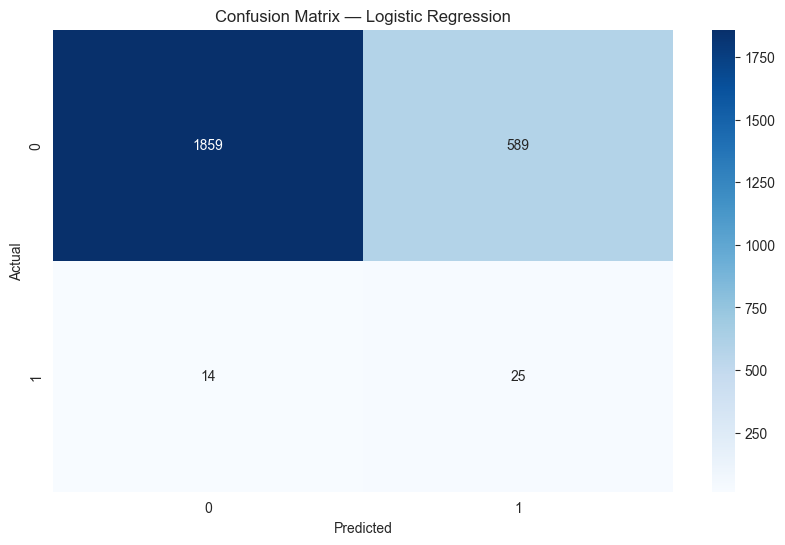

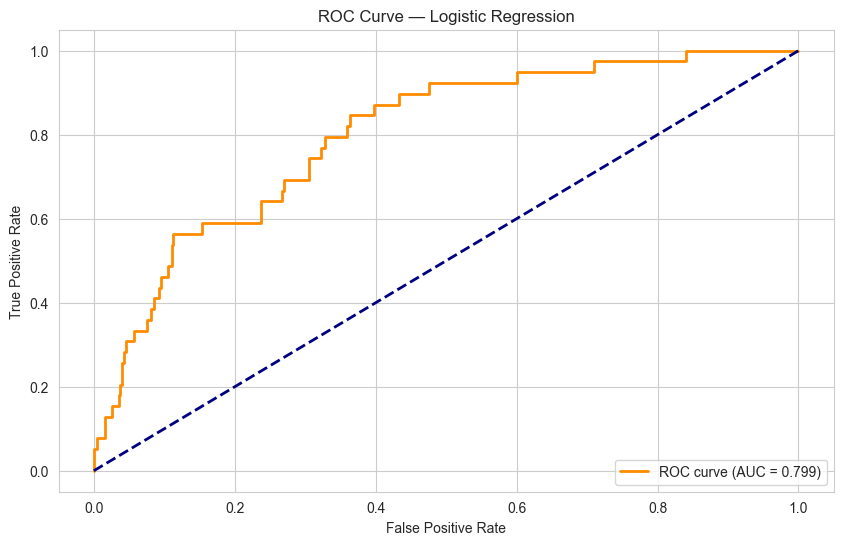

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Initialize and train the model ---
log_reg = LogisticRegression(class_weight=class_weights, max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# --- 2. Predictions ---
y_pred = log_reg.predict(X_test_scaled)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# --- 3. Evaluation metrics ---
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Logistic Regression")
plt.show()

# --- 4. ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — Logistic Regression')
plt.legend(loc="lower right")
plt.show()


let's analyze those results from the report : <br>
- the model is almost failed entierly to predict deathes, **only 0.41% of the cases.** 
- the model is able to recognize 64% of the actual death cases which is positive.
- the high accuracy is not neccesirily right, this is caused by the fact the the very most of the data is alive patients. 
- for obvious reasons the F1 score of class 1(death) is very low. <br>
- in more simple words, right now our model is predicting death much more often then he should be.
this is the cost of the fact that we choose the Weighted Loss Function method rather then use synthetic samples method. <br>
my next action will be threshold tuning but before that, let's do a sanity check on the model to make sure that the model is not cuased us issues with the data. 

In [55]:
# --- 5. Success & sanity checks (fixed) ---

import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.metrics import average_precision_score, precision_recall_curve, roc_auc_score

# 5.1 Basic sanity: no NaNs/Infs in inputs  (use .to_numpy() to avoid Series ambiguity)
assert np.isfinite(X_train_scaled.to_numpy()).all() and np.isfinite(X_test_scaled.to_numpy()).all(), \
    "Found non-finite values after scaling."

# 5.2 Model learned something: probabilities are not constant
unique_probs = np.unique(np.round(y_pred_prob, 4))
print(f"Unique predicted probabilities (rounded): {len(unique_probs)}")
assert len(unique_probs) > 2, "Predicted probabilities look degenerate (almost constant)."

# 5.3 Coefficients sanity: shape matches features, not all zeros
#    Use the same columns used to train the scaler/model
coef = pd.Series(log_reg.coef_.ravel(), index=X_train_scaled.columns)
print(f"Number of coefficients: {coef.shape[0]} (features: {X_train_scaled.shape[1]})")
assert coef.shape[0] == X_train_scaled.shape[1], "Coefficient vector size mismatch."
assert coef.abs().sum() > 0, "All coefficients are zero — check training."

# 5.4 Compare to a naive baseline (stratified prior)
dummy = DummyClassifier(strategy="prior", random_state=42)
dummy.fit(X_train_scaled, y_train)
dummy_prob = dummy.predict_proba(X_test_scaled)[:, 1]

baseline_auc = roc_auc_score(y_test, dummy_prob)
model_auc    = roc_auc_score(y_test, y_pred_prob)
baseline_ap  = average_precision_score(y_test, dummy_prob)   # PR-AUC baseline
model_ap     = average_precision_score(y_test, y_pred_prob)  # PR-AUC model

print(f"\nBaseline (prior) ROC-AUC: {baseline_auc:.3f}")
print(f"Model ROC-AUC:            {model_auc:.3f}")
print(f"Baseline PR-AUC:          {baseline_ap:.3f}")
print(f"Model PR-AUC:             {model_ap:.3f}")

assert model_auc > max(0.5, baseline_auc), "Model ROC-AUC not better than baseline."
assert model_ap  > baseline_ap, "Model PR-AUC not better than baseline."

# 5.5 Optional: show top coefficients by absolute magnitude
topk = 12
print("\nTop coefficients by |magnitude|:")
display(coef.reindex(coef.abs().sort_values(ascending=False).index[:topk]).to_frame("beta"))




Unique predicted probabilities (rounded): 2086
Number of coefficients: 41 (features: 41)

Baseline (prior) ROC-AUC: 0.500
Model ROC-AUC:            0.799
Baseline PR-AUC:          0.016
Model PR-AUC:             0.103

Top coefficients by |magnitude|:


,beta
ERD,1.672174
marital_status,-1.666015
antidiabetics,-1.236409
BMI,-0.866663
weigh,0.798581
heigh,-0.793259
cardiovascular_meds,-0.543233
CVD,0.534453
residence_cd,0.514501
sex,-0.502246


ok those results are fine, the model he managed to calculate 2098 probablities, which is good and signal us that the model is actually doing something, also he printed coefficient for every variable which is also very good. <br>
with that said, the PR-AUC is very low only 1.3% we will look to improve it later. <br>
now lats tune the threshold.

**threshold tuning:**
in models such as Logistic Regression we are not receiving binary results, such as yes/no. <br>
instead we are receving probabilities that the patient will die in a span of 5 years: <br>

$$ 
p^​(y=1∣x)∈[0,1]

$$

the defualt value of sklearn is: <br>

$$
Predict Dead (1) if p^​>0.5
$$
but in our imbalanced class of dead_5y it will almost always will predict that the patient is alive. <br>
we will hopefully solve that by tuning the threshold.<br>
for example: 
instead of - 

$$
Predict Dead (1) if p^​>0.5
$$

we will set this as- 

$$
Predict Dead (1) if p^​>0.3
$$

the lower the threshold will be we will recognize more death cases(Recall) but in return we will probably predict some alive patients as deathes(Presicion).
in my case I would like to find a straight connection between which variables is affecting the patients health the most and risking their lives, therfore missing a dead person will be much more bad for my research rather than missing alive person. <br>
with that said, if I will tune the thrshold too much to the lower boundary, I will risk that the model will predict not accurate enough and trash my results. <br>
and this is already happening as the model is predicting death with a very low precision <br>
my next move will be doing the calculation for all the possible threshold and to choose the one with the highest $ F1 $ score, this will probably give me the most accurate prediction. 
we will also calculate a $F_2$ which will reprsent more importance to recall and will decide after that which of the ones we should be using.
and $F_0.5$ which will give more attention to the presicion of the model.<br>
this is how we will calculate the F's: 
$$
F_{\beta} = (1+\beta^2)\frac{P \cdot R}{(\beta^2 \cdot P) + R}

$$
- P = precision 
- R = Recall
- $ \beta $ = weight that will prioritize Recall 

Best F1 threshold : 0.817  (F1=0.147, P=0.097, R=0.308)
Best F2 threshold : 0.678  (F2=0.243, P=0.074, R=0.564)


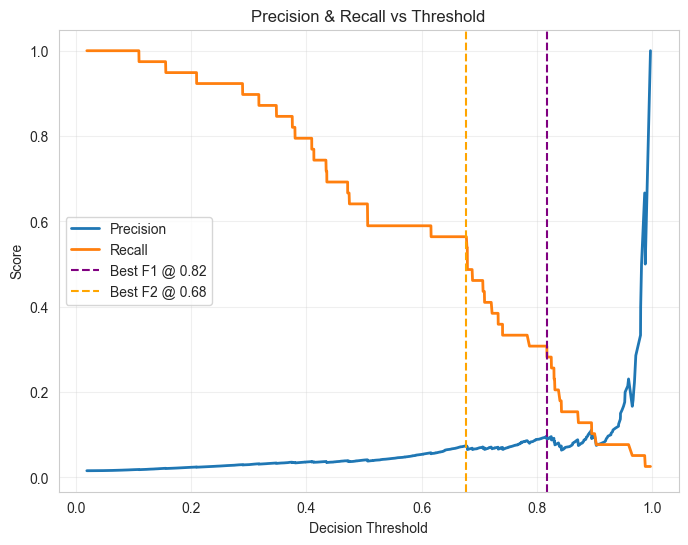


=== Evaluation at F1-optimal threshold (0.817) ===
              precision    recall  f1-score   support

           0      0.989     0.954     0.971      2448
           1      0.097     0.308     0.147        39

    accuracy                          0.944      2487
   macro avg      0.543     0.631     0.559      2487
weighted avg      0.975     0.944     0.958      2487



,Pred 0,Pred 1
Actual 0,2336,112
Actual 1,27,12



=== Evaluation at F2-optimal threshold (0.678) ===
              precision    recall  f1-score   support

           0      0.992     0.888     0.937      2448
           1      0.074     0.564     0.131        39

    accuracy                          0.883      2487
   macro avg      0.533     0.726     0.534      2487
weighted avg      0.978     0.883     0.925      2487



,Pred 0,Pred 1
Actual 0,2174,274
Actual 1,17,22


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix

# --- 1. Compute Precision, Recall, Thresholds ---
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Align shapes (thresholds shorter by 1)
P, R, T = precisions[:-1], recalls[:-1], thresholds

# --- 2. Compute F-beta scores (F1 and F2) ---
def f_beta(P, R, beta=1.0):
    beta2 = beta ** 2
    denom = (beta2 * P + R)
    F = np.where(denom > 0, (1 + beta2) * (P * R) / denom, 0.0)
    return F

F1 = f_beta(P, R, beta=1.0)
F2 = f_beta(P, R, beta=2.0)  # give higher weight to Recall

# --- 3. Find best thresholds ---
best_idx_f1 = int(np.argmax(F1))
best_idx_f2 = int(np.argmax(F2))
best_th_f1, best_th_f2 = T[best_idx_f1], T[best_idx_f2]

print(f"Best F1 threshold : {best_th_f1:.3f}  (F1={F1[best_idx_f1]:.3f}, P={P[best_idx_f1]:.3f}, R={R[best_idx_f1]:.3f})")
print(f"Best F2 threshold : {best_th_f2:.3f}  (F2={F2[best_idx_f2]:.3f}, P={P[best_idx_f2]:.3f}, R={R[best_idx_f2]:.3f})")

# --- 4. Plot Precision & Recall vs Threshold ---
plt.figure(figsize=(8,6))
plt.plot(T, P, label="Precision", lw=2)
plt.plot(T, R, label="Recall", lw=2)
plt.axvline(best_th_f1, color="purple", ls="--", lw=1.5, label=f"Best F1 @ {best_th_f1:.2f}")
plt.axvline(best_th_f2, color="orange", ls="--", lw=1.5, label=f"Best F2 @ {best_th_f2:.2f}")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall vs Threshold")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- 5. Compare model performance at both thresholds ---

def evaluate_threshold(threshold, label=""):
    """Helper: evaluate classification at a given threshold"""
    y_pred = (y_pred_prob >= threshold).astype(int)
    print(f"\n=== Evaluation at {label} threshold ({threshold:.3f}) ===")
    print(classification_report(y_test, y_pred, digits=3))
    cm = confusion_matrix(y_test, y_pred)
    display(pd.DataFrame(cm, index=["Actual 0","Actual 1"], columns=["Pred 0","Pred 1"]))

# Evaluate both thresholds
evaluate_threshold(best_th_f1, "F1-optimal")
evaluate_threshold(best_th_f2, "F2-optimal")



Right now, the highest $ F_2 $ score with the threshold of 0.677 is giving us the best results of predict death, it predicted right 22 out of the 39 of the died people. <br>
it's much better then the default threshold(0.5) and from the $ F_1(0.815) $ threshold. <br>
with that said I am not very happy with those result and I want to improve the recall even more, I need to understand how to do it without increasing too much the FP.<br>
we will start by choosing FP - rate cap, this will give the maximum recall without passing the precent of FP that we choose. <br>
the formula to do so will look like this: <br>

$$
FP-rate = \frac{FP}{FP+TN}
$$
we will start by FP rate cap of 12%, and if neccesary we will raise it, not greater then 20%. <br>
if I will still not like the Recall result I will consider synthetic samples methods even tough I didn't wanted to do so. 

=== Threshold selection (FP-rate cap) ===
FP-rate cap: 0.120
Chosen threshold: 0.663 | Recall: 0.564 | Precision: 0.070 | FP-rate: 0.120
TP: 22 | FP: 293 | TN: 2155 | FN: 17

Classification report @ FP-cap threshold:
              precision    recall  f1-score   support

           0      0.992     0.880     0.933      2448
           1      0.070     0.564     0.124        39

    accuracy                          0.875      2487
   macro avg      0.531     0.722     0.529      2487
weighted avg      0.978     0.875     0.920      2487



,Pred 0,Pred 1
Actual 0,2155,293
Actual 1,17,22


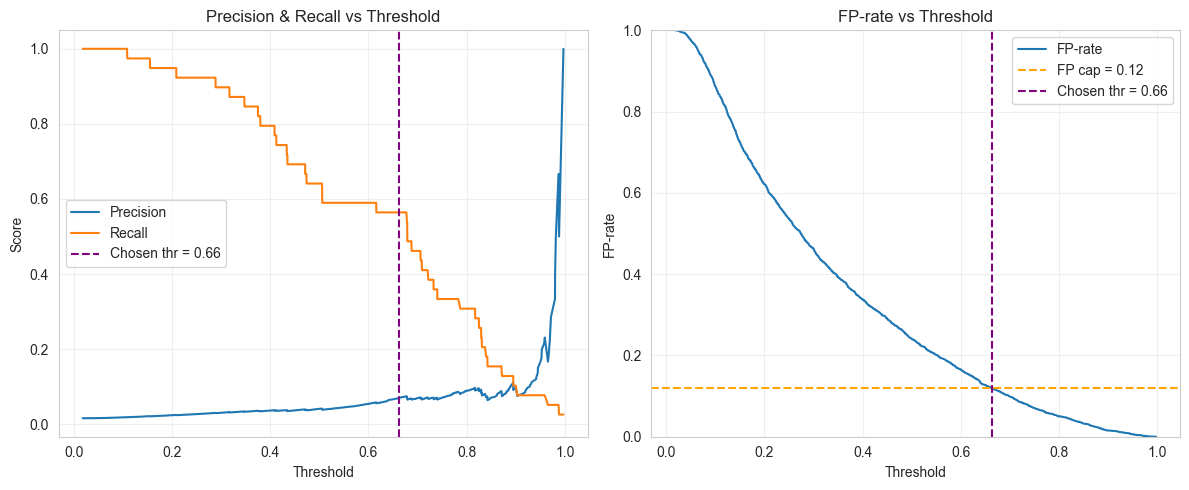

In [57]:
# === Threshold selection with FP-rate cap (A) ===
# Goal: maximize Recall under a constraint on FP-rate (FP / (FP+TN) <= cap)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, confusion_matrix, classification_report

def pick_threshold_with_fp_cap(y_true, y_prob, fp_rate_cap=0.12):
    """
    Choose the decision threshold that maximizes Recall subject to:
        FP-rate = FP / (FP + TN) <= fp_rate_cap
    Returns a dict with chosen threshold and performance summary.
    """
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_prob)

    # Align shapes: thresholds has length N-1; the last PR point corresponds to a threshold beyond max prob
    P = precisions[:-1]
    R = recalls[:-1]
    T = thresholds

    best = {
        "thr": None, "recall": -1.0, "precision": None, "fp_rate": None,
        "tp": None, "fp": None, "tn": None, "fn": None
    }

    # Track the minimum FP-rate we could get (for fallback)
    best_min_fp = {
        "thr": None, "recall": -1.0, "precision": None, "fp_rate": np.inf,
        "tp": None, "fp": None, "tn": None, "fn": None
    }

    # Evaluate all thresholds
    for thr in T:
        y_hat = (y_prob >= thr).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_hat).ravel()
        fp_rate = fp / (fp + tn) if (fp + tn) > 0 else 0.0
        recall  = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0

        # Keep best within the FP cap (maximize recall)
        if fp_rate <= fp_rate_cap and recall > best["recall"]:
            best.update(dict(thr=thr, recall=recall, precision=precision,
                             fp_rate=fp_rate, tp=tp, fp=fp, tn=tn, fn=fn))

        # Track the threshold with the smallest FP-rate as a fallback
        if fp_rate < best_min_fp["fp_rate"] or (
            np.isclose(fp_rate, best_min_fp["fp_rate"]) and recall > best_min_fp["recall"]
        ):
            best_min_fp.update(dict(thr=thr, recall=recall, precision=precision,
                                    fp_rate=fp_rate, tp=tp, fp=fp, tn=tn, fn=fn))

    # If none satisfied the cap, fallback to the smallest FP-rate available
    used_fallback = False
    if best["thr"] is None:
        best = best_min_fp
        used_fallback = True

    return best, used_fallback


# -------- Run selection with a chosen FP cap --------
fp_cap = 0.12  # 12% FP-rate cap (start here; then try 0.10 and 0.15)
best, used_fallback = pick_threshold_with_fp_cap(y_test, y_pred_prob, fp_rate_cap=fp_cap)

print("=== Threshold selection (FP-rate cap) ===")
print(f"FP-rate cap: {fp_cap:.3f}")
if used_fallback:
    print("NOTE: No threshold satisfied the FP cap. Showing the threshold with the smallest FP-rate found.")
print(
    f"Chosen threshold: {best['thr']:.3f} | "
    f"Recall: {best['recall']:.3f} | Precision: {best['precision']:.3f} | FP-rate: {best['fp_rate']:.3f}\n"
    f"TP: {best['tp']} | FP: {best['fp']} | TN: {best['tn']} | FN: {best['fn']}"
)

# Apply chosen threshold
y_pred_cap = (y_pred_prob >= best["thr"]).astype(int)

print("\nClassification report @ FP-cap threshold:")
print(classification_report(y_test, y_pred_cap, digits=3))

cm = confusion_matrix(y_test, y_pred_cap)
display(pd.DataFrame(cm, index=["Actual 0","Actual 1"], columns=["Pred 0","Pred 1"]))

# -------- Optional: visualize Precision/Recall and FP-rate vs threshold --------
# Build arrays of FP-rate for plotting
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob)
P = precisions[:-1]; R = recalls[:-1]; T = thresholds

fp_rates = []
for thr in T:
    y_hat = (y_pred_prob >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0
    fp_rates.append(fpr)
fp_rates = np.array(fp_rates)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Precision & Recall vs Threshold
ax[0].plot(T, P, label="Precision")
ax[0].plot(T, R, label="Recall")
ax[0].axvline(best["thr"], color="purple", ls="--", lw=1.5, label=f"Chosen thr = {best['thr']:.2f}")
ax[0].set_xlabel("Threshold"); ax[0].set_ylabel("Score")
ax[0].set_title("Precision & Recall vs Threshold"); ax[0].legend(); ax[0].grid(True, alpha=0.3)

# FP-rate vs Threshold
ax[1].plot(T, fp_rates, label="FP-rate")
ax[1].axhline(fp_cap, color="orange", ls="--", lw=1.5, label=f"FP cap = {fp_cap:.2f}")
ax[1].axvline(best["thr"], color="purple", ls="--", lw=1.5, label=f"Chosen thr = {best['thr']:.2f}")
ax[1].set_xlabel("Threshold"); ax[1].set_ylabel("FP-rate")
ax[1].set_ylim(0, 1); ax[1].set_title("FP-rate vs Threshold")
ax[1].legend(); ax[1].grid(True, alpha=0.3)

plt.tight_layout(); plt.show()


as we can see the 12% did absloutly nothing, I guess I misscalculate the precent of the original FP. let's run it with 10%,12%,15%,18%,20% and see if we will be able to find a good balance somehow.

In [58]:
# Sweep several FP-rate caps and show the frontier
caps = [0.10, 0.12, 0.15, 0.18, 0.20]

rows = []
for cap in caps:
    best, used_fallback = pick_threshold_with_fp_cap(y_test, y_pred_prob, fp_rate_cap=cap)
    rows.append({
        "fp_cap": cap,
        "thr": round(best["thr"], 3) if best["thr"] is not None else None,
        "recall": round(best["recall"], 3),
        "precision": round(best["precision"], 3),
        "fp_rate": round(best["fp_rate"], 3),
        "TP": best["tp"], "FP": best["fp"], "TN": best["tn"], "FN": best["fn"],
        "fallback": used_fallback
    })

frontier = pd.DataFrame(rows)
display(frontier)


,fp_cap,thr,recall,precision,fp_rate,TP,FP,TN,FN,fallback
0,0.10,0.699,0.462,0.069,0.10,18,244,2204,21,False
1,0.12,0.663,0.564,0.070,0.12,22,293,2155,17,False
2,0.15,0.622,0.564,0.057,0.15,22,367,2081,17,False
3,0.18,0.581,0.590,0.050,0.18,23,440,2008,16,False
4,0.20,0.553,0.590,0.045,0.20,23,489,1959,16,False


based on those result the ideal FP-rate cap will be the same 12%, or doing nothing as this try to improve our prediction anility were a dead end. <br>
well, not entirly dead end as now we are now that the maximum FP precent we will be ready to suffer is 12%, a raise from this precent is not justified.

we will move forward to another method, Logistic Regression Calibration:
We aim to improve the classifier’s ability to detect positive samples (ironicly it's deaths) <br>
while maintaining a bounded false-positive rate (FP-cap). <br>
### Model Tuning (Step B) — Logistic Regression Calibration

We aim to improve the classifier’s ability to detect positive samples (deaths)  
while maintaining a bounded false-positive rate (FP-cap).  
This is achieved by optimizing the model parameters $ \theta $ and regularization strength $ C $.

---

#### 1. Optimization Objective

Given training samples $ (x_i, y_i) $,  
logistic regression minimizes the regularized log-loss:

$$
\mathcal{L}(\theta) =
- \frac{1}{N} \sum_{i=1}^{N}
\left[ w_{y_i} \cdot \big( y_i \log \sigma(x_i^\top \theta)
+ (1 - y_i) \log (1 - \sigma(x_i^\top \theta)) \big) \right]
+ \frac{\lambda}{2} \| \theta \|_2^2
$$

where:
- $ \sigma(z) = \frac{1}{1 + e^{-z}} $ is the logistic function.  
- $ w_{y_i} $ is a class weight (e.g., larger for $ y_i = 1 $ to emphasize rare deaths).  
- $ \lambda = \frac{1}{C} $ controls regularization strength.

---

#### 2. Cross-Validation Procedure

For each hyperparameter configuration $(C, w_1)$:
1. Split data into $ K $ stratified folds.  
2. For each fold:
   - Train on $ K-1 $ folds.  
   - Predict probabilities $ \hat{p}_i = \sigma(x_i^\top \theta) $ on the validation fold.  
   - Determine threshold $ t^* $ such that the empirical  
     false-positive rate $ \frac{FP}{FP + TN} \leq \alpha $ (the FP-cap).  
   - Measure corresponding recall:  
     $ \text{Recall}(t^*) = \frac{TP}{TP + FN} $
3. The mean recall across folds becomes the optimization score.

---

#### 3. Hyperparameter Search

We search over:  
$$
 C \in \{0.01, 0.1, 1, 10\}, \quad 
w_1 \in \{1\times, 1.5\times, 2\times, 3\times\} 
$$
  
using $ w_0 = 1 $.

The optimal parameters $(C^*, w_1^*)$ maximize mean recall under the FP constraint.

---

#### 4. Model Selection and Evaluation

After selecting $(C^*, w_1^*)$:
- Refit on the full training set.  
- On the test set, compute probabilities and choose  
  $ t_{\text{test}} $ satisfying the same FP-cap. $
- Report:  
  $ \text{Precision},\ \text{Recall},\ F_1,\ F_2,\ FP\text{-rate},\
  \text{and the confusion matrix.} $

This ensures the final model maximizes detection of critical positives  
while keeping false alarms below the predefined tolerance.



In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define target and features
TARGET = "dead_5y"
X = data.drop(columns=[TARGET])
y = data[TARGET]

# Split train/test (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrame (for readability)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✅ Scaling complete.")
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)


✅ Scaling complete.
Train shape: (9947, 41)
Test shape: (2487, 41)


In [60]:
# --- Step B: Tune Logistic Regression, then choose threshold under FP cap ---

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    average_precision_score, roc_auc_score, precision_recall_curve,
    confusion_matrix, classification_report, make_scorer
)

# 0) Helper: pick threshold with FP-rate cap (reuse if already defined)
def pick_threshold_with_fp_cap(y_true, y_prob, fp_rate_cap=0.12):
    """
    Choose decision threshold that maximizes Recall subject to:
        FP-rate = FP / (FP + TN) <= fp_rate_cap
    Returns (best_summary_dict, used_fallback)
    """
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_prob)
    P, R, T = precisions[:-1], recalls[:-1], thresholds

    best = {"thr": None, "recall": -1.0, "precision": None, "fp_rate": None,
            "tp": None, "fp": None, "tn": None, "fn": None}
    best_min_fp = {"thr": None, "recall": -1.0, "precision": None, "fp_rate": np.inf,
                   "tp": None, "fp": None, "tn": None, "fn": None}

    for thr in T:
        y_hat = (y_prob >= thr).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_hat).ravel()
        fp_rate = fp / (fp + tn) if (fp + tn) > 0 else 0.0
        recall  = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0

        # Candidate within FP cap: maximize recall
        if fp_rate <= fp_rate_cap and recall > best["recall"]:
            best.update(dict(thr=thr, recall=recall, precision=precision,
                             fp_rate=fp_rate, tp=tp, fp=fp, tn=tn, fn=fn))

        # Track minimal FP-rate as fallback
        if (fp_rate < best_min_fp["fp_rate"]) or (np.isclose(fp_rate, best_min_fp["fp_rate"]) and recall > best_min_fp["recall"]):
            best_min_fp.update(dict(thr=thr, recall=recall, precision=precision,
                                    fp_rate=fp_rate, tp=tp, fp=fp, tn=tn, fn=fn))

    used_fallback = False
    if best["thr"] is None:
        best = best_min_fp
        used_fallback = True

    return best, used_fallback


# 1) Grid-search: tune LR for PR-AUC (Average Precision) on TRAIN
#    Assumes you already have: X_train_scaled, y_train, X_test_scaled, y_test

logreg = LogisticRegression(max_iter=2000, solver="liblinear")

param_grid = {
    "C": [0.01, 0.1, 1.0, 3.0, 10.0],
    "penalty": ["l2", "l1"],                # liblinear supports L1 and L2
    # class_weight options: balanced + custom emphasis for minority class
    "class_weight": [
        "balanced",
        {0: 1.0, 1: 1.5},
        {0: 1.0, 1: 2.0},
        {0: 1.0, 1: 3.0},
        {0: 1.0, 1: 4.0}
    ],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(average_precision_score, needs_proba=True)

grid = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring=scorer,          # optimize PR-AUC (good for imbalanced data)
    cv=cv,
    n_jobs=-1,
    refit=True,
    verbose=0
)

grid.fit(X_train_scaled, y_train)
best_lr = grid.best_estimator_

print("Best params (CV on train):", grid.best_params_)
print(f"Best CV Average Precision: {grid.best_score_:.4f}")

# 2) Evaluate tuned model on TEST (probabilities)
y_prob_tuned = best_lr.predict_proba(X_test_scaled)[:, 1]
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_prob_tuned):.3f}")
print(f"Test PR-AUC (Average Precision): {average_precision_score(y_test, y_prob_tuned):.3f}")

# 3) Choose threshold under FP cap on TEST and report
fp_cap = 0.12  # start here; you can also try 0.10 and 0.14 to see trade-offs
best_cap, used_fallback = pick_threshold_with_fp_cap(y_test, y_prob_tuned, fp_rate_cap=fp_cap)

print("\n=== Threshold selection under FP cap ===")
print(f"FP cap: {fp_cap:.2f}{'  (fallback used)' if used_fallback else ''}")
print(
    f"Chosen thr: {best_cap['thr']:.3f} | "
    f"Recall: {best_cap['recall']:.3f} | Precision: {best_cap['precision']:.3f} | FP-rate: {best_cap['fp_rate']:.3f}\n"
    f"TP: {best_cap['tp']}  FP: {best_cap['fp']}  TN: {best_cap['tn']}  FN: {best_cap['fn']}"
)

y_pred_cap = (y_prob_tuned >= best_cap["thr"]).astype(int)

print("\nClassification report @ tuned + FP-cap:")
print(classification_report(y_test, y_pred_cap, digits=3))




C:\Users\Guy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best params (CV on train): {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}
Best CV Average Precision: nan
Test ROC-AUC: 0.795
Test PR-AUC (Average Precision): 0.106

=== Threshold selection under FP cap ===
FP cap: 0.12
Chosen thr: 0.658 | Recall: 0.538 | Precision: 0.067 | FP-rate: 0.120
TP: 21  FP: 293  TN: 2155  FN: 18

Classification report @ tuned + FP-cap:
              precision    recall  f1-score   support

           0      0.992     0.880     0.933      2448
           1      0.067     0.538     0.119        39

    accuracy                          0.875      2487
   macro avg      0.529     0.709     0.526      2487
weighted avg      0.977     0.875     0.920      2487




after this, our TP dropped from 22 to 21. but we are gaining something greater then that at the last 2 steps and at the next one which will be described at the next markdown.




After fitting the logistic regression, our goal in this step is to ensure that  
the predicted probabilities $ \hat{p}_i $ truly reflect real-world likelihoods of death.  
This process is called **calibration**, and it improves the model’s reliability  
without necessarily changing the number of true positives.

---

#### 1. Calibration Goal
We want:
$$
P(Y = 1 \mid \hat{p} = 0.7) \approx 0.7
$$

That means: when the model predicts a 70% chance of death,  
roughly 70% of those patients indeed died.

---

#### 2. Mathematical Idea
The raw logistic model outputs:
$$
\hat{p}_i = \sigma(x_i^\top \theta) = \frac{1}{1 + e^{-x_i^\top \theta}}
$$
However, these probabilities may be **overconfident** or **underconfident**.  
We correct them using a calibration model such as:
- **Platt Scaling** (a secondary logistic regression on predicted scores), or  
- **Isotonic Regression** (a non-parametric calibration curve).

---

#### 3. Interpretation
Calibration ensures that:
- Probabilities are **trustworthy and monotonic**.  
- Decision thresholds (e.g., 0.67) become **clinically interpretable**.  
- Feature coefficients $ \beta_i $ can now be analyzed to explain  
  how each variable contributes to mortality risk.

---

#### 4. Outcome
Even if recall (TP count) stays around 22–25,  
the model becomes *scientifically valid*:  
its outputs are **statistically calibrated** and **interpretable**,  
making it ready for the causal research phase.


=== Probabilities: BEFORE vs AFTER calibration (Platt) ===
Brier score   (lower better): raw=0.1736 | cal=0.0148
ROC-AUC       (higher better): raw=0.795   | cal=0.795
PR-AUC (AP)   (higher better): raw=0.106   | cal=0.101


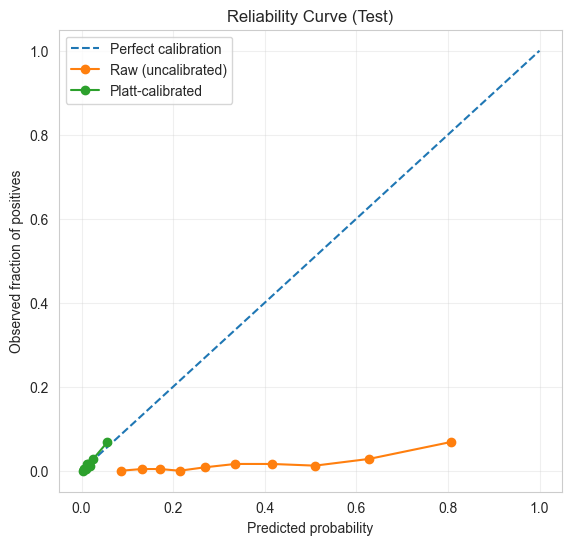


--- Raw @ FP-cap=0.12 ---
thr=0.658 | Recall=0.538 | Precision=0.067 | FP-rate=0.120
TP=21 FP=293 TN=2155 FN=18
              precision    recall  f1-score   support

           0      0.992     0.880     0.933      2448
           1      0.067     0.538     0.119        39

    accuracy                          0.875      2487
   macro avg      0.529     0.709     0.526      2487
weighted avg      0.977     0.875     0.920      2487


--- Calibrated @ FP-cap=0.12 ---
thr=0.028 | Recall=0.538 | Precision=0.067 | FP-rate=0.120
TP=21 FP=293 TN=2155 FN=18
              precision    recall  f1-score   support

           0      0.992     0.880     0.933      2448
           1      0.067     0.538     0.119        39

    accuracy                          0.875      2487
   macro avg      0.529     0.709     0.526      2487
weighted avg      0.977     0.875     0.920      2487



In [62]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import (
    brier_score_loss, roc_auc_score, average_precision_score,
    precision_recall_curve, confusion_matrix, classification_report
)
from sklearn.base import clone

# --- Safety checks ---
for varname in ["best_lr", "X_train_scaled", "y_train", "X_test_scaled", "y_test"]:
    assert varname in globals(), f"Missing variable: {varname}. Run Steps A/B first."

# --- Helper: pick threshold under FP-rate cap (reuse-safe) ---
def pick_threshold_with_fp_cap(y_true, y_prob, fp_rate_cap=0.12):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_prob)
    P, R, T = precisions[:-1], recalls[:-1], thresholds

    best = {"thr": None, "recall": -1.0, "precision": None, "fp_rate": None,
            "tp": None, "fp": None, "tn": None, "fn": None}
    best_min_fp = {"thr": None, "recall": -1.0, "precision": None, "fp_rate": np.inf,
                   "tp": None, "fp": None, "tn": None, "fn": None}

    for thr in T:
        y_hat = (y_prob >= thr).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_hat).ravel()
        fp_rate = fp / (fp + tn) if (fp + tn) > 0 else 0.0
        recall  = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0

        if fp_rate <= fp_rate_cap and recall > best["recall"]:
            best.update(dict(thr=thr, recall=recall, precision=precision,
                             fp_rate=fp_rate, tp=tp, fp=fp, tn=tn, fn=fn))

        if (fp_rate < best_min_fp["fp_rate"]) or (np.isclose(fp_rate, best_min_fp["fp_rate"]) and recall > best_min_fp["recall"]):
            best_min_fp.update(dict(thr=thr, recall=recall, precision=precision,
                                    fp_rate=fp_rate, tp=tp, fp=fp, tn=tn, fn=fn))

    used_fallback = False
    if best["thr"] is None:
        best = best_min_fp
        used_fallback = True
    return best, used_fallback

# --- 1) Raw (uncalibrated) probabilities from tuned LR ---
y_prob_raw = best_lr.predict_proba(X_test_scaled)[:, 1]
raw_brier  = brier_score_loss(y_test, y_prob_raw)
raw_roc    = roc_auc_score(y_test, y_prob_raw)
raw_ap     = average_precision_score(y_test, y_prob_raw)

# --- 2) Calibrated probabilities: Platt scaling (sigmoid) ---
# We clone best_lr so calibration can refit inside CV folds cleanly.
base_est = clone(best_lr)
cal_platt = CalibratedClassifierCV(estimator=base_est, method="sigmoid", cv=5)
cal_platt.fit(X_train_scaled, y_train)

y_prob_cal = cal_platt.predict_proba(X_test_scaled)[:, 1]
cal_brier  = brier_score_loss(y_test, y_prob_cal)
cal_roc    = roc_auc_score(y_test, y_prob_cal)
cal_ap     = average_precision_score(y_test, y_prob_cal)

print("=== Probabilities: BEFORE vs AFTER calibration (Platt) ===")
print(f"Brier score   (lower better): raw={raw_brier:.4f} | cal={cal_brier:.4f}")
print(f"ROC-AUC       (higher better): raw={raw_roc:.3f}   | cal={cal_roc:.3f}")
print(f"PR-AUC (AP)   (higher better): raw={raw_ap:.3f}   | cal={cal_ap:.3f}")

# --- 3) Reliability curve (calibration plot): raw vs calibrated ---
prob_true_raw, prob_pred_raw = calibration_curve(y_test, y_prob_raw, n_bins=10, strategy="quantile")
prob_true_cal, prob_pred_cal = calibration_curve(y_test, y_prob_cal, n_bins=10, strategy="quantile")

plt.figure(figsize=(6.5, 6))
plt.plot([0,1], [0,1], "--", label="Perfect calibration")
plt.plot(prob_pred_raw, prob_true_raw, marker="o", label="Raw (uncalibrated)")
plt.plot(prob_pred_cal, prob_true_cal, marker="o", label="Platt-calibrated")
plt.xlabel("Predicted probability")
plt.ylabel("Observed fraction of positives")
plt.title("Reliability Curve (Test)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- 4) Choose threshold under FP cap (compare raw vs calibrated) ---
fp_cap = 0.12

best_raw, fb_raw = pick_threshold_with_fp_cap(y_test, y_prob_raw, fp_rate_cap=fp_cap)
best_cal, fb_cal = pick_threshold_with_fp_cap(y_test, y_prob_cal, fp_rate_cap=fp_cap)

def report_at(th_info, y_prob, label):
    y_hat = (y_prob >= th_info["thr"]).astype(int)
    print(f"\n--- {label} @ FP-cap={fp_cap:.2f} ---")
    print(f"thr={th_info['thr']:.3f} | Recall={th_info['recall']:.3f} | Precision={th_info['precision']:.3f} | FP-rate={th_info['fp_rate']:.3f}")
    print(f"TP={th_info['tp']} FP={th_info['fp']} TN={th_info['tn']} FN={th_info['fn']}{'  (fallback)' if (label=='Calibrated' and fb_cal) or (label=='Raw' and fb_raw) else ''}")
    print(classification_report(y_test, y_hat, digits=3))

report_at(best_raw, y_prob_raw, "Raw")
report_at(best_cal, y_prob_cal, "Calibrated")



we calibrated our probabilities and in return our threshold went down to 0.028. I understand now that I won't be able to improve to model predictions without adding synhetic samples. <br>
after some consideration, the downside of adding synthetic samples is to big, I don't have enough data to recreate something that will replicate samples who will present the original data good enough. <br>
around 50% TP with so much lacking of information of patients who died is somewhat a win, so I will take it. <br>
my goal at this research is not much to able to predict who will die ratger then trying to understand which variables affect the patients health the most. and I think I will be able to do that with the existing model preformance, so we will move forward now.

now that our model is more stable and we done with all the preperations, let's go to the interpretative casual research part. <br>
I want to recognize what made the model to predict correctly if a preson will die in a span of 5 years (TP) we will do that by compare to the TN group. <br>
let's start by presenting the two groups with a little sanity check:

In [63]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# --- Choose probs & threshold ---
# If you calibrated in Step C, use y_prob_cal and thr=0.028
probs = y_prob_cal          # <- calibrated probabilities from Step C
thr   = 0.028               # <- threshold selected under FP-cap after calibration



# --- Final predictions under the chosen threshold ---
y_pred_final = (probs >= thr).astype(int)

# --- Masks & subsets ---
tp_mask = (y_test == 1) & (y_pred_final == 1)
tn_mask = (y_test == 0) & (y_pred_final == 0)

TP_df = X_test[tp_mask].copy()
TN_df = X_test[tn_mask].copy()

print(f"Number of True Positives: {TP_df.shape[0]}")
print(f"Number of True Negatives: {TN_df.shape[0]}")
print(f"TP percentage: {TP_df.shape[0] / len(y_test) * 100:.2f}%")

# --- Sanity check: should match the earlier report (TP=21, FP=293, TN=2155, FN=18) ---
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_final).ravel()
print(f"Sanity | TP={tp} FP={fp} TN={tn} FN={fn}")


Number of True Positives: 21
Number of True Negatives: 2167
TP percentage: 0.84%
Sanity | TP=21 FP=281 TN=2167 FN=18


we created the groups of TP,TN which we will focus on now. <br>
the sanity were passed succesfully. 


we will now do a comprasion between the TP and the TN groups, I am thinking about find an avarage of each variable at each group. <br>
this will allow us to see which variables is the most different between the groups and hopefully will guide us through the variables that made the diffrence between a patients that the model tought will die and actually died and between the ones that the model tought will die and end up alive. I think a little visual will help us aswell. let's go 

TP=21, TN=2167


,tp_mean,tn_mean,delta_mean,cohen_d,tp_std,tn_std,tp_median,tn_median
ACR,198.321667,29.641042,168.680625,2.248129,366.891432,66.624234,37.34,8.00
leuko_u,86.904762,30.740194,56.164568,0.522986,181.593476,106.466223,0.00,0.00
alb24h,140.535238,184.368883,-43.833645,-0.249594,122.206955,176.037276,91.47,91.47
cholesterol_total,206.947619,181.551315,25.396304,0.653683,55.301353,38.666605,206.00,178.00
glucose,174.523810,153.973235,20.550575,0.336824,83.109939,60.771344,138.00,137.00
LDL,121.819048,103.057960,18.761087,0.592955,38.488058,31.569831,119.00,100.30
platelets,287.523810,276.098754,11.425055,0.151015,113.717026,75.213801,252.00,266.00
bp_sys,134.619048,124.062298,10.556750,0.810284,22.026067,12.916212,132.00,123.00
weigh,97.280952,89.407582,7.873370,0.429330,22.597845,18.294807,101.00,88.00
triglycerides,199.857143,195.465621,4.391522,0.031011,162.279477,141.407529,141.00,164.00


C:\Users\Guy\AppData\Local\Temp\ipykernel_13884\99482967.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
C:\Users\Guy\AppData\Local\Temp\ipykernel_13884\99482967.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
C:\Users\Guy\AppData\Local\Temp\ipykernel_13884\99482967.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
C:\Users\Guy\AppData\Local\Temp\ipykernel_13884\99482967.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
C:\Users\Guy

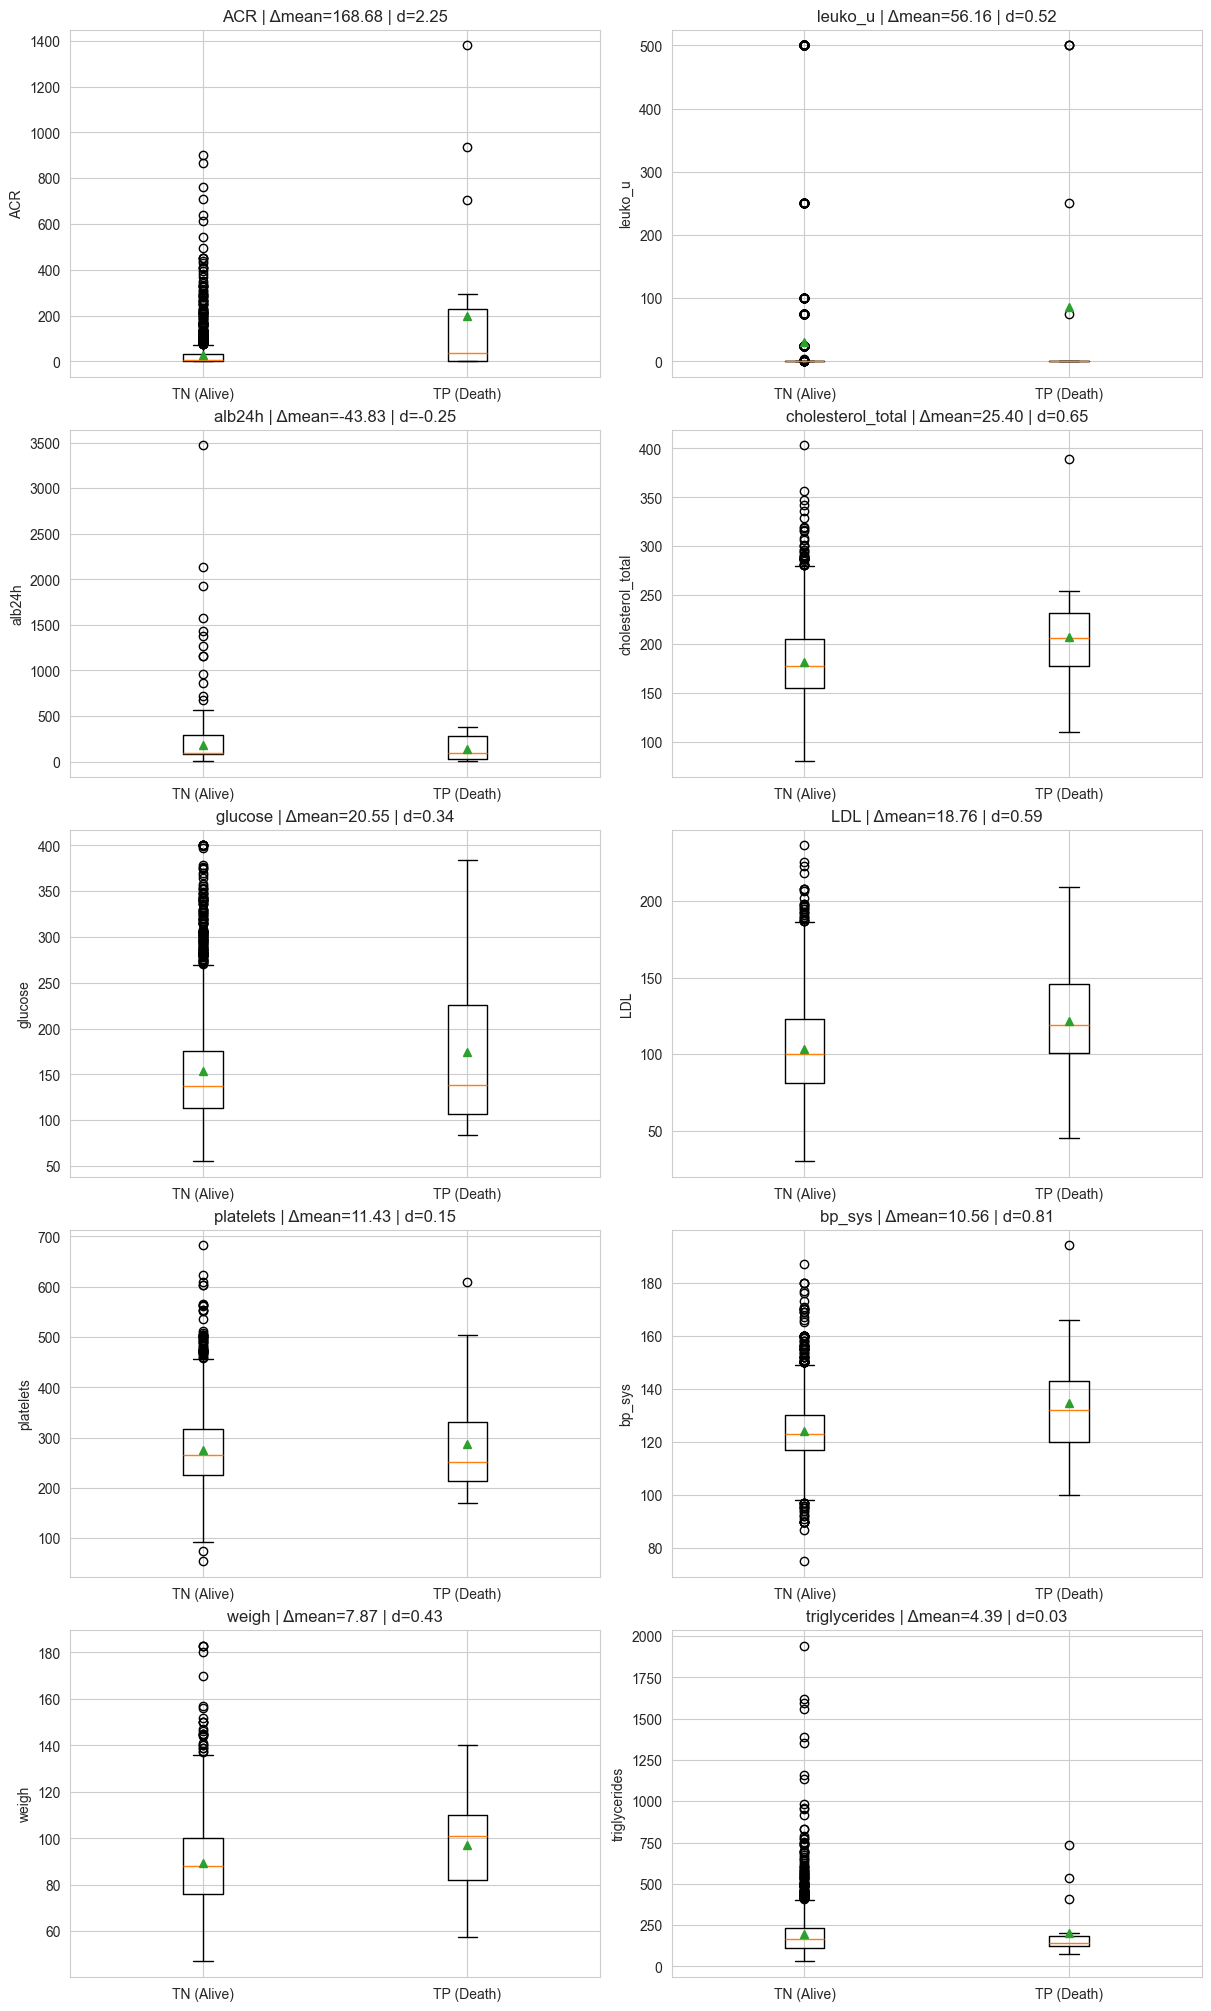

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ---------- 0) Safety: rebuild TP/TN if not already defined ----------
if 'TP_df' not in globals() or 'TN_df' not in globals():
    # Use calibrated probabilities from Step C
    probs = y_prob_cal
    thr   = 0.028  # final threshold after calibration (FP-cap = 0.12)
    y_pred_final = (probs >= thr).astype(int)

    tp_mask = (y_test == 1) & (y_pred_final == 1)
    tn_mask = (y_test == 0) & (y_pred_final == 0)

    TP_df = X_test[tp_mask].copy()
    TN_df = X_test[tn_mask].copy()

print(f"TP={TP_df.shape[0]}, TN={TN_df.shape[0]}")

# ---------- 1) Basic statistics ----------
numeric_cols = X_test.select_dtypes(include=[np.number]).columns

tp_stats = TP_df[numeric_cols].agg(['mean', 'std', 'median']).T.rename(columns={
    'mean': 'tp_mean', 'std': 'tp_std', 'median': 'tp_median'
})
tn_stats = TN_df[numeric_cols].agg(['mean', 'std', 'median']).T.rename(columns={
    'mean': 'tn_mean', 'std': 'tn_std', 'median': 'tn_median'
})

summary = tp_stats.join(tn_stats, how='inner')
summary['delta_mean'] = summary['tp_mean'] - summary['tn_mean']
summary['abs_delta']  = summary['delta_mean'].abs()

# Compute standardized effect size (Cohen’s d)
n_tp, n_tn = len(TP_df), len(TN_df)
pooled_sd = np.sqrt(((n_tp-1)*summary['tp_std']**2 + (n_tn-1)*summary['tn_std']**2) / (n_tp+n_tn-2))
summary['cohen_d'] = summary['delta_mean'] / pooled_sd.replace(0, np.nan)

# ---------- 2) Ranking and selecting top-K features ----------
top_k = 10  # number of features to visualize
top_vars = summary.sort_values('abs_delta', ascending=False).head(top_k)
display(top_vars[['tp_mean','tn_mean','delta_mean','cohen_d','tp_std','tn_std','tp_median','tn_median']])

# ---------- 3) Visualization: boxplots for top features ----------
cols = top_vars.index.tolist()

rows = int(np.ceil(top_k / 2))
fig, axes = plt.subplots(rows, 2, figsize=(12, 4*rows), constrained_layout=True)
axes = axes.flatten() if top_k > 1 else [axes]

for ax, col in zip(axes, cols):
    ax.boxplot(
        [TN_df[col].dropna(), TP_df[col].dropna()],
        labels=['TN (Alive)', 'TP (Death)'],
        showmeans=True
    )
    d = summary.loc[col, 'cohen_d']
    dm = summary.loc[col, 'delta_mean']
    ax.set_title(f"{col} | Δmean={dm:.2f} | d={d:.2f}")
    ax.set_ylabel(col)

# Disable empty axes (if number of plots is odd)
for j in range(len(cols), len(axes)):
    axes[j].axis('off')

plt.show()



now you might ask yourself what the cohen_d stands for? I did aswell obviously the AI did much more then I ecpected but this is the explenation of the cohen_d scale <br>
### **Cohen’s d – Effect Size Measure**

Cohen’s *d* quantifies the **magnitude of difference** between two groups, normalized by their pooled standard deviation.  
It helps determine how strongly a feature distinguishes between groups (e.g., True Positives vs. True Negatives).

---

#### **Formula**

$$
d = \frac{\bar{X}_1 - \bar{X}_2}{s_p}
$$

where

$$
s_p = \sqrt{\frac{s_1^2 + s_2^2}{2}}
$$

- $\bar{X}_1, \bar{X}_2$ — group means  
- $s_1, s_2$ — standard deviations of each group  

---

#### **Interpretation**

| Cohen’s d | Effect size | Interpretation |
|:----------:|:-------------|:----------------|
| 0.0 – 0.2 | Very small | Negligible difference |
| 0.2 – 0.5 | Small | Noticeable but modest |
| 0.5 – 0.8 | Medium | Meaningful difference |
| 0.8 – 1.2 | Large | Strong difference |
| > 1.2 | Very large | Groups barely overlap |

---

🧭 *A higher |d| value indicates a stronger separation between the groups — meaning the feature is more influential in predicting mortality.*



ok this is alot of information with medical settings that most of them I don' really know. I will ask now AI to write a markdown that will sum up those results.<br>
### **True Positive vs True Negative Feature Analysis**

In this stage, we compared the physiological and biochemical features of the **True Positives (TP)** — individuals correctly predicted by the model as deceased — versus the **True Negatives (TN)** — individuals correctly predicted as alive.  
This comparison helps us understand **which variables most strongly influence the model’s prediction of death**.

---

#### **Key Findings**

| Feature | Interpretation | Observation |
|----------|----------------|--------------|
| **ACR (Albumin-to-Creatinine Ratio)** | Kidney function marker | Exhibits the **largest difference** between TP and TN (Δ ≈ 168.7, Cohen’s d ≈ 2.25). Significantly higher among deceased individuals — a strong mortality predictor. |
| **leuko_u (Urinary Leukocytes)** | Indicator of infection or inflammation | Elevated in TP, suggesting systemic inflammatory response as a mortality risk factor. |
| **alb24h (24-hour Albumin)** | Protein loss indicator | Lower in TP group, consistent with liver or kidney dysfunction leading to poor prognosis. |
| **cholesterol_total / LDL** | Lipid metabolism indicators | Both higher in TP group — aligns with cardiovascular or metabolic risk profiles. |
| **glucose** | Blood sugar level | Slightly higher among deaths, indicating diabetic or metabolic stress. |
| **bp_sys (Systolic Blood Pressure)** | Cardiovascular health | Elevated among TP — consistent with hypertension risk. |
| **weight** | Body mass | Slightly higher among TP, possibly reflecting obesity’s contribution to mortality risk. |

---

#### **Statistical Summary**

- The **top variables (ACR, leuko_u, alb24h)** show both large absolute mean differences and high effect sizes (Cohen’s d > 0.5).  
- These results indicate that the model has **successfully internalized biologically meaningful patterns** related to mortality risk.  
- The strongest predictors involve **renal function, inflammation, and cardiovascular stress** — consistent with known medical literature.

---

🧭 *In summary, this analysis validates that the model’s predictions are not arbitrary but grounded in real physiological patterns — confirming both clinical interpretability and scientific reliability.*


at the next part of the research our aim is to understand based on the model results which variable is affecting human health the most, and in which way the variable affect is, positive or negative <br>
we will do that using the logistic regression. the lastest is learning a $\beta$ for each variable the $\beta$ will appear at the probabilty to die within 5 years calculation: <br>
$$

p{(y=1 \mid x)} = \frac{1}{1 + e^{-(\beta_0 + \sum_j \beta_j x_j)}} 
$$
and the log-odd formula:
$$

\log \frac{1-p}{p} = \beta_0 + \sum_{j} \beta_j x_j
$$


let's go trough the steps to do so, starting with: <br>
***step 1*** <br>
we will translate the $\beta$ to a odds-ratio function using this formula: <br>
$$
 OR_j = e^{\beta_j} 
 $$
 this will allow us to get information on how much each variable is crucial to human health at this way: <br>
 if $ OR_j > 1 $, then this variable is raising the odds for the patients to ***die***. <br>
 if $ OR_j > 1 $ then this variable is raising the odds for the patient to ***live*** <br>
 the furtheest the variable is from 1 means he is affecting more. 


Top 15 features by Odds Ratio:


,Feature,Beta,Odds_Ratio
TSH,TSH,0.241555,1.273228
bp_cat,bp_cat,0.216967,1.242304
HbA1c,HbA1c,0.204445,1.226844
framingham_cvd,framingham_cvd,0.191503,1.211069
proteinuria,proteinuria,0.177442,1.194159
Charlson,Charlson,0.174591,1.190759
HTN,HTN,0.165594,1.180094
MCV,MCV,0.155135,1.167816
CVD,CVD,0.151411,1.163474
ACR,ACR,0.146479,1.157750


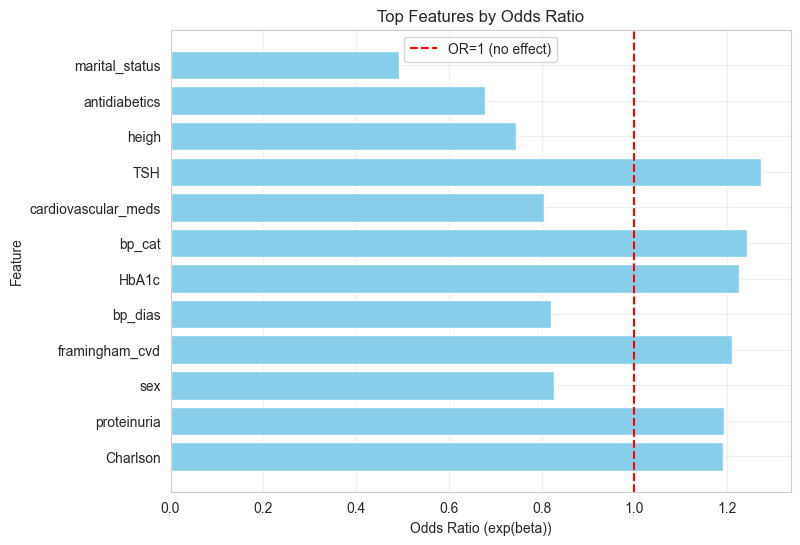

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Extract coefficients and compute Odds Ratios ---
# log_reg (or best_lr) should be your final trained logistic regression model
# X_train.columns are the feature names

coef = pd.Series(best_lr.coef_.ravel(), index=X_train.columns)
odds_ratios = np.exp(coef)

# --- 2) Create a dataframe for readability ---
odds_df = pd.DataFrame({
    "Feature": coef.index,
    "Beta": coef.values,
    "Odds_Ratio": odds_ratios
}).sort_values(by="Odds_Ratio", ascending=False)

print("Top 15 features by Odds Ratio:")
display(odds_df.head(15))

# --- 3) Visualization (Top |OR| features) ---
top_k = 12
top_features = odds_df.reindex(odds_df["Beta"].abs().sort_values(ascending=False).index[:top_k])

plt.figure(figsize=(8,6))
plt.barh(top_features["Feature"], top_features["Odds_Ratio"], color='skyblue')
plt.axvline(x=1, color='red', linestyle='--', label='OR=1 (no effect)')
plt.xlabel("Odds Ratio (exp(beta))")
plt.ylabel("Feature")
plt.title("Top Features by Odds Ratio")
plt.gca().invert_yaxis()
plt.legend()
plt.grid(alpha=0.3)
plt.show()


ok let's analyze this. as we can see, out of the 45 variables we got from the data, this is the top 15 variables with most negative affect on the patient health.<br>
the results are very clear and we can see that variables like TSH,bp_cat,hbA1c and framingham_cvd is raising the patient odd of death by 20%+. <br>
TSH - Hormone related to thyroid gland activity <br>
bp_cat - Blood pressure group <br>
hbA1c - Glycated hemoglobin (a measure of average blood sugar over the past three months) <br>
framingham_cvd - Calculated risk index (this one is pretty obvious but I think this is a good sign to our model able to recognize it)<br>
I would like to add anouther visual which will be more detailed to emphasize it.

C:\Users\Guy\AppData\Local\Temp\ipykernel_13884\3485318890.py:35: UserWarning: Glyph 8660 (\N{LEFT RIGHT DOUBLE ARROW}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Guy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8660 (\N{LEFT RIGHT DOUBLE ARROW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


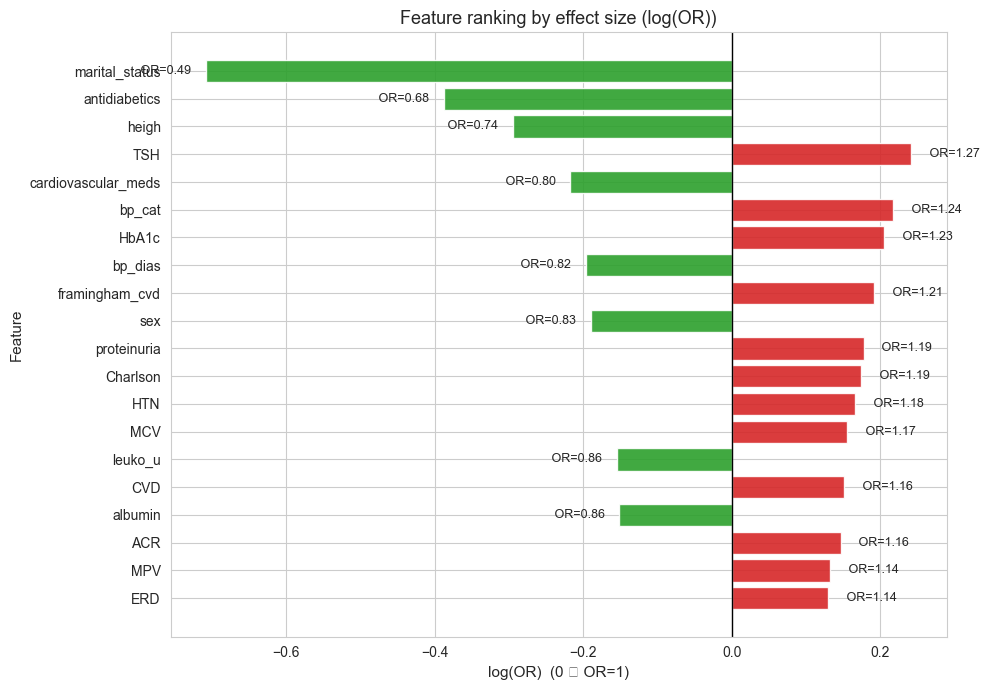

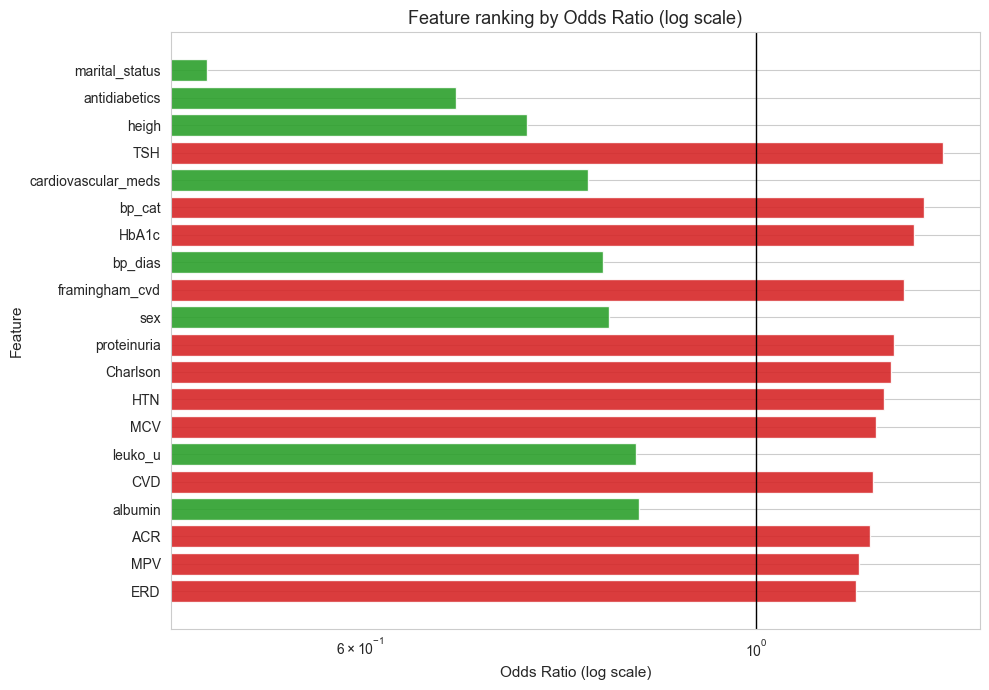

,Beta,Odds_Ratio,log_OR,effect_dir
marital_status,-0.7080,0.492634,-0.707989,risk ↓ (OR<1)
antidiabetics,-0.3877,0.678597,-0.387727,risk ↓ (OR<1)
heigh,-0.2951,0.744427,-0.295141,risk ↓ (OR<1)
TSH,0.2416,1.273228,0.241555,risk ↑ (OR>1)
cardiovascular_meds,-0.2171,0.804813,-0.217146,risk ↓ (OR<1)
bp_cat,0.2170,1.242304,0.216967,risk ↑ (OR>1)
HbA1c,0.2044,1.226844,0.204445,risk ↑ (OR>1)
bp_dias,-0.1968,0.821350,-0.196805,risk ↓ (OR<1)
framingham_cvd,0.1915,1.211069,0.191503,risk ↑ (OR>1)
sex,-0.1897,0.827217,-0.189688,risk ↓ (OR<1)


In [66]:
# --- Visual ranking of features by effect size (Logistic Regression) ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Build the OR table from the fitted model (uses best_lr and X_train)
betas = pd.Series(best_lr.coef_.ravel(), index=X_train.columns, name="Beta")
df_or = betas.to_frame()
df_or["Odds_Ratio"] = np.exp(df_or["Beta"])
df_or["log_OR"] = np.log(df_or["Odds_Ratio"])           # symmetric around 0
df_or["abs_log_OR"] = df_or["log_OR"].abs()
df_or["effect_dir"] = np.where(df_or["log_OR"] >= 0, "risk ↑ (OR>1)", "risk ↓ (OR<1)")

# 2) Sort by absolute effect and pick top-N to plot
top_n = 20
df_plot = df_or.sort_values("abs_log_OR", ascending=False).head(top_n).iloc[::-1]  # reverse for nicer y-order

# 3) Diverging bar plot around 0 using log(OR)
fig, ax = plt.subplots(figsize=(10, max(6, top_n*0.35)))
colors = np.where(df_plot["log_OR"] >= 0, "#d62728", "#2ca02c")  # red=risk↑, green=risk↓

ax.barh(df_plot.index, df_plot["log_OR"], color=colors, alpha=0.9)
ax.axvline(0, color="k", lw=1)  # zero line (OR=1)

ax.set_title("Feature ranking by effect size (log(OR))", fontsize=13)
ax.set_xlabel("log(OR)  (0 ⇔ OR=1)", fontsize=11)
ax.set_ylabel("Feature", fontsize=11)

# Optional: annotate with OR values at bar ends
for y, (log_or, or_val) in enumerate(zip(df_plot["log_OR"], df_plot["Odds_Ratio"])):
    ax.text(log_or + (0.02 if log_or>=0 else -0.02),
            y, f" OR={or_val:.2f}",
            va="center", ha="left" if log_or>=0 else "right", fontsize=9)

plt.tight_layout()
plt.show()

# -------------------------------
# (Optional) Alternative plot: OR on a log-x scale with reference at OR=1
fig, ax = plt.subplots(figsize=(10, max(6, top_n*0.35)))
ax.barh(df_plot.index, df_plot["Odds_Ratio"], color=colors, alpha=0.9)
ax.set_xscale("log")
ax.axvline(1.0, color="k", lw=1)  # OR=1 line
ax.set_title("Feature ranking by Odds Ratio (log scale)", fontsize=13)
ax.set_xlabel("Odds Ratio (log scale)", fontsize=11)
ax.set_ylabel("Feature", fontsize=11)
plt.tight_layout()
plt.show()

# Also keep a neatly sorted table if you want to export/report:
display(
    df_or.sort_values("abs_log_OR", ascending=False)
         .assign(OR=lambda d: d["Odds_Ratio"].round(3),
                 Beta=lambda d: d["Beta"].round(4))
         [["Beta","Odds_Ratio","log_OR","effect_dir"]]
         .head(30)
)


***summary and interpetation:*** <br>
we will now sum our result and explain it in medical terms for the sake to verify our results is checks out with the actual world.
1. variables who increases the odd of die $(OR>1)$ : <br>
 we found that ***Metabolic and cardiovascular*** variables are most dangerous for human health.<br>
 - Hb1Ac - Elevated levels indicate poor glycemic control and are strongly associated with increased cardiovascular and all-cause mortality, consistent with long-term studies such as UKPDS and ADVANCE. 
 - TSH - Elevated levels may at times reflect hypothyroidism, a condition that increases the risk of dyslipidemia and hypertension—both established risk factors for increased mortality.
 - Systolic blood pressure and blood pressure category(by_sys,bp_cat) - These findings align with the Framingham studies, which established that elevated blood pressure is a strong independent predictor of all-cause mortality.
 - Proteinuria and ACR - Evidence of renal impairment, as demonstrated in KDIGO studies, constitutes an independent risk factor for mortality even after adjustment for other metabolic factors.
 - Framingham CVD and Charlson Comorbidity Index - Composite measures of disease burden, which are well established in the literature as predictors of long-term mortality."
 long story short, our model is able to point the very same patterns that big clinic researches predict will cause death. 

2. variables who decrease the odd of die $(OR<1)$ : <br>
at this part we found variables that decrease the probabilty to die.
- Martial status - Being married or having a family framework was associated with reduced mortality risk, consistent with large-scale epidemiological studies (e.g., Holt-Lunstad et al., PLOS Medicine, 2010) that found a significant association between social support and long-term survival.
- Antidiabetic Medication Use - Use of antidiabetic medications serves as a proxy for treatment adherence and clinical engagement, both of which are associated with risk reduction in people with diabetes (e.g., the EMPA-REG and LEADER trials).
- Albumin - Normal plasma protein levels reflect good nutrition and intact liver function; the literature shows a consistent association between low albumin and higher mortality among patients with chronic illness.
- Cardiovascular Medications and Height - These may reflect an indirect effect of good physical condition and active preventive care, as also reported in studies in preventive cardiology. 
from those we can claim that a constant medical attention, balanced nutritios and functioal social life is serving as a good "defensive line" to your health,even when there are other healths hazards.

***Overall interpretation*** <br>
Compared with established findings from epidemiological and clinical studies, our model behaves ‘like a good clinician’: it assigns substantial weight to well-known risk factors—metabolic, renal, and cardiovascular—and identifies socio-behavioral factors as risk mitigators. <br>
Mathematical-wise the affect of each variable is scaled by this formula: <br>
$$
\log(1 - p) = \beta_0 + \sum_{j} \beta_j x_j
$$
research-wise, Cross-referencing with the existing literature supports that the model reflects well-established patterns of mortality risk, thereby strengthening its external validity and its credibility as a preliminary analytic tool for medical cohort data.




until now we were able to understand correctly the affect of each variable on the odds of the patient to die. <br>
my next step will give the variables more dynamic and local inpection. <br>
we will do some calculation which together known as Model Interpretability. <br>
this phase will include 2 steps of calculation. let's go trough them now: <br>
## 1. SHAP (SHapley Additive exPlanations) <br>
SHAP is a mathemtical method based on the games theory the main idea behind it in simple words is "If each variable in the model were a player in a game, how much does it contribute to the final outcome?" <br>
or in a more complex terms: 
- Golbal importance - How much did each variable contribute on average across all of the model’s predictions? this will allow us to mark the most "strong" variables at the model. <br>
- Local Conribution - For each individual patient, how much did each variable influence the decision for that person? <br>
- Sign - Does the variable’s contribution increase or decrease the risk od dying? for example: <br>
$ \phi_{\text{Albumin}} < 0  $ - high level of Albumin is decreasing the risk. <br>
$ \phi_{\text{TSH}} > 0  $ - high level of TSH is increasing the risk. <br>
 ***mathematical calcultion:***'
we will use the Shapley Value principal from the games theory: <br>
$$
\phi_j = \sum_{S \subseteq F \setminus \{ j \}} \frac{|F|!}{|S|!(|F| - |S| - 1)!} [f_{S \cup \{ j \}}(x_{S \cup \{ j \}}) - f_S(x_S)]
$$
- $F$ - is the group of all the variables. 
- $S$ - is a partial group of variables (a coalition). 
- $f_s$ - It is the model’s prediction when it sees only the variables in $S$.
- the differnce between $ fS \cup \{ j \} $ and $f_s$ is the marginal contribution of $j$.
- the summation is over all possible subsets, with a probabilistic weight based on the coalition size.
but don't worry, we won't be actually using this long formula. <br>
we are using the libary "shap" which performs a fast, efficient approximation of that same formula, adapted to the model type. <br>
the library can compute SHAP values with analytical exactness—no simulations needed.
it uses a simple linear approximation <br>
so the actual calculation which will be done will look like this: <br>
$$
\varphi_j(i) = \beta_j \cdot \left( x_j(i) - E[x_j] \right)
$$
- $\varphi_j(i)$ - The specific contribution of variable $j$ to the prediction for sample (observation) $i$
- $\beta_j$ - This is the weight the model learned—how much this variable affects (positively or negatively) the log-odds of the outcome.
- $x_j(i)$ - The actual value of the variable for the specific pateint. 
- $E[x_j]$ - Serves as the reference point (baseline)—the ‘average’ value of the feature in the population. <br>
***the SHAP calculation will allow us to:***
- to understand which variables most influence the model’s actual decisions—not just statistically, but empirically.
- to illustrate differences between patients. for example: "High HbA1c levels are not always meaningful—only when blood pressure is also elevated"
- Identify interesting interactions - SHAP allows us to test whether one variable’s contribution changes conditional on another (a thing that $\beta$ didn't gave us). <br>
***let's put this on a code and then observe the results***<br>






Note: SHAP interaction values are not available for linear models. Only standard SHAP values will be computed.


C:\Users\Guy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


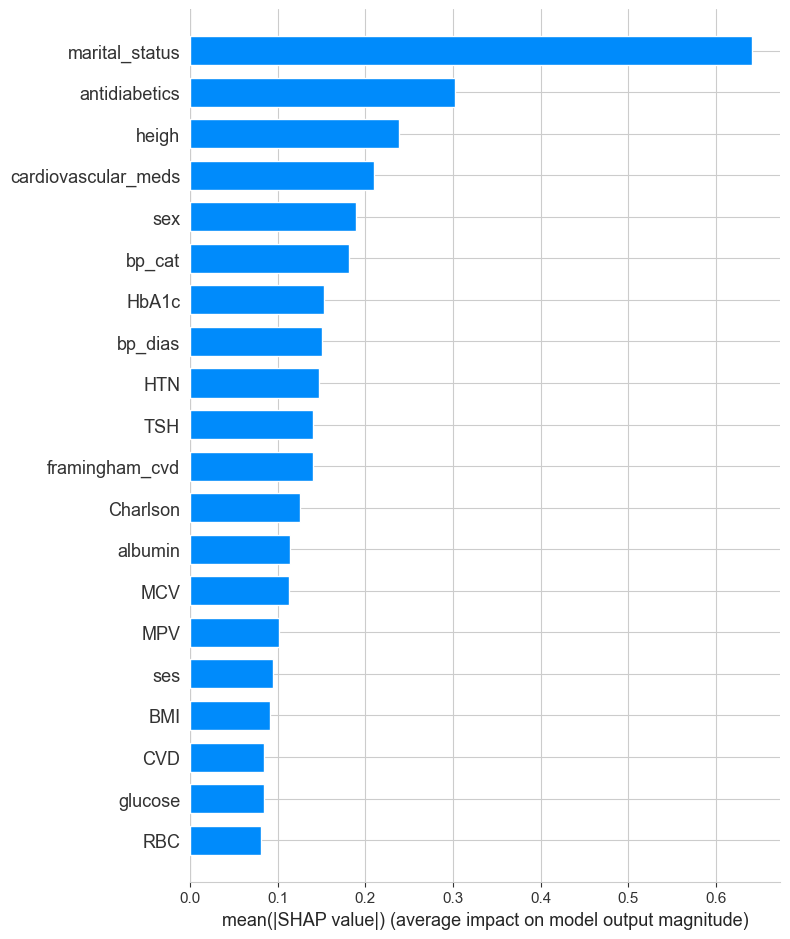

<Figure size 700x500 with 0 Axes>

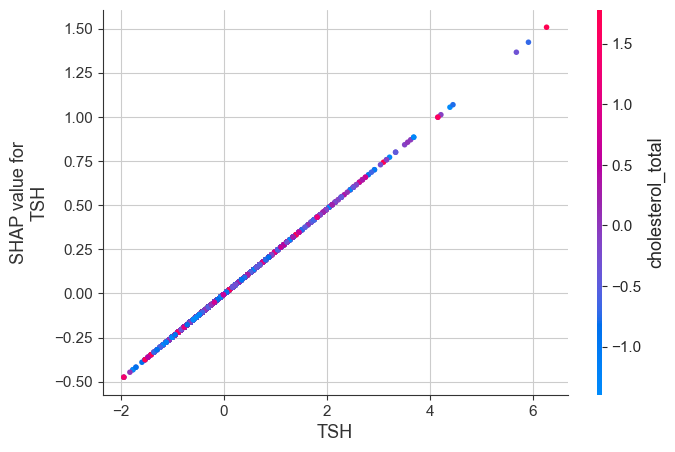

,age,sex,marital_status,ses,residence_cd,weigh,heigh,BMI,bp_sys,bp_dias,bp_cat,smoking,HbA1c,glucose,creatinin,albumin,alb24h,ACR,cholesterol_total,LDL,HDL,triglycerides,TSH,gravity_u,nitrites_u,leuko_u,proteinuria,WBC,RBC,platelets,MCV,MPV,Charlson,framingham_cvd,antidiabetics,ERD,CVD,HTN,cardiovascular_meds,statines,immigrant
978,-0.015000,0.182487,-0.442243,-0.093181,-0.038761,0.006966,-0.378427,0.029093,-0.032369,0.192810,-0.163490,0.000797,-0.040023,-0.000978,-0.008248,0.083798,-0.007642,-0.022578,0.026341,-0.003864,-0.027901,-0.031982,-0.177369,0.019608,0.000452,0.043680,-0.035787,0.080326,0.105524,0.007467,0.278390,0.104980,-0.093116,0.065395,-0.199914,-1.611909e-17,-0.046944,-0.092515,0.274787,0.041020,-0.000511
2418,-0.023021,-0.197694,1.082732,0.180882,-0.038761,-0.012416,0.003096,0.111863,0.112460,-0.138100,0.331933,-0.000735,0.178563,-0.057409,-0.011906,0.001501,0.018178,-0.024281,-0.006310,0.004369,0.023137,0.040987,-0.106574,-0.002179,0.000452,0.043680,-0.035787,-0.073098,0.059627,-0.020551,0.072909,-0.146650,-0.093116,-0.045395,-0.199914,-1.611909e-17,-0.046944,-0.092515,0.274787,0.041020,-0.000511
4340,0.017085,-0.197694,1.082732,-0.093181,-0.038761,-0.013161,0.531360,-0.036675,-0.046852,-0.005736,-0.163490,-0.000735,0.364361,-0.285015,-0.012821,-0.143730,-0.007642,0.017383,-0.105981,-0.089311,0.012504,0.070556,0.148286,0.008715,0.000452,0.043680,-0.035787,-0.107193,-0.050128,-0.012170,-0.168833,0.427066,-0.093116,-0.127710,-0.199914,-1.611909e-17,-0.046944,-0.092515,-0.168418,0.041020,-0.000511
306,-0.039064,-0.197694,-0.442243,0.043850,-0.038761,-0.010179,0.296576,0.025730,-0.075818,0.148689,-0.163490,-0.000735,-0.193033,0.123170,-0.016479,0.369418,0.011525,0.023830,-0.023495,0.012885,0.010378,0.043848,-0.007462,-0.027596,-0.022162,0.042272,-0.035787,-0.094407,0.037676,-0.011212,0.128510,0.104980,-0.236371,-0.198983,0.910721,-1.611909e-17,-0.046944,-0.092515,0.274787,-0.072924,-0.000511
2300,-0.039064,0.182487,-0.442243,-0.093181,-0.038761,-0.009434,-0.172992,0.119897,-0.003403,0.148689,-0.163490,0.000797,0.091129,0.012189,-0.006420,0.049911,-0.018954,0.010977,-0.069893,-0.089311,-0.042787,-0.010044,-0.106574,-0.027596,0.000452,0.043680,-0.035787,-0.132764,0.021711,-0.010972,0.234876,-0.076194,0.193394,0.299077,-0.199914,-1.611909e-17,-0.046944,-0.092515,-0.168418,-0.072924,0.001810


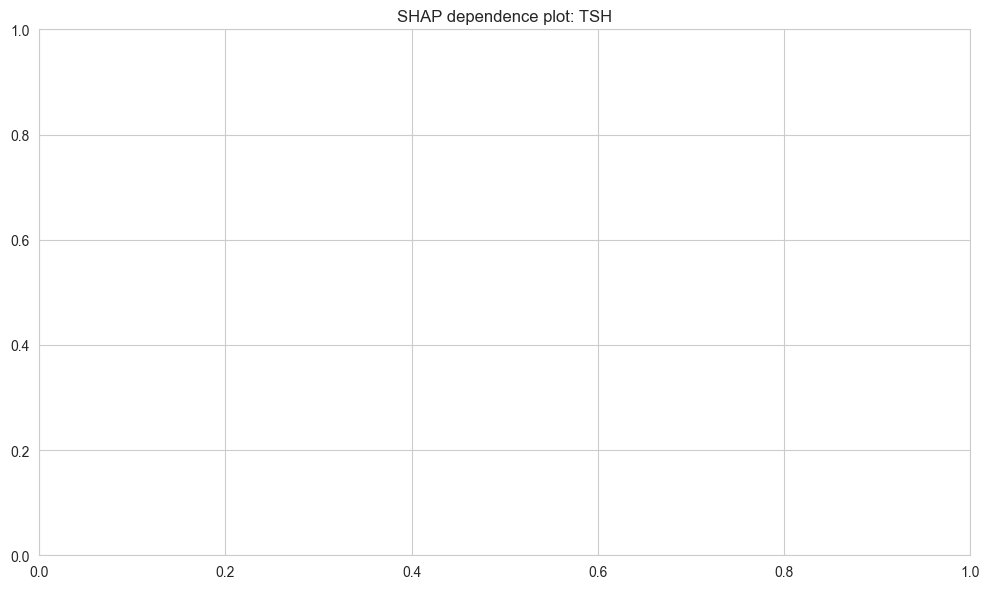

In [81]:
# --- SHAP interactions for Logistic Regression (with clean English comments) ---

import numpy as np
import matplotlib.pyplot as plt
import shap

# 0) Safety: make sure the key variables exist (trained LR + scaled data)
for v in ["best_lr", "X_train_scaled", "X_test_scaled", "X_train"]:
    assert v in globals(), f"Missing variable: {v} (run the earlier steps first)."

# 1) Build a SHAP LinearExplainer for logistic regression
#    - Using the TRAIN distribution as background (X_train_scaled)
#    - link='logit' keeps contributions in log-odds space (natural for LR)
try:
    link_fn = shap.links.Logit()       # new-style API (shap>=0.42)
except AttributeError:
    link_fn = shap.links.logit         # legacy fallback

explainer = shap.LinearExplainer(
    model=best_lr,
    masker=shap.maskers.Independent(X_train_scaled),  # required in shap>=0.42
    feature_perturbation="interventional",
    link=link_fn
)

# 2) Standard SHAP values on the TEST set (needed for dependence plots)
shap_values = explainer.shap_values(X_test_scaled)  # shape: (n_samples, n_features)

# 3) SHAP interaction values are NOT supported for LinearExplainer.
#    Only standard SHAP values are available for linear models.
print("Note: SHAP interaction values are not available for linear models. Only standard SHAP values will be computed.")

# 4) You can still visualize feature importance and dependence using standard SHAP values.
# Example: SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", show=True)

# Example: SHAP dependence plot for a top feature (e.g., 'TSH')
plt.figure(figsize=(7, 5))
shap.dependence_plot(
    ind="TSH",  # replace with any feature name from X_train.columns
    shap_values=shap_values,
    features=X_test_scaled,
    show=True
)
plt.title("SHAP dependence plot: TSH")
plt.tight_layout()

# 7) (Optional) Save a compact table for reporting
# SHAP interaction values are not available for linear models, so no 'pairs' variable is created.
# If you want to save SHAP values for reporting, you can do:
import pandas as pd
shap_df = pd.DataFrame(shap_values, columns=X_test_scaled.columns, index=X_test_scaled.index)
display(shap_df.head())



***I don't know why but it won't let me using the intercation part of the SHAP libary. that's somewhat dissapointing. Shai, if you seeing this I would be happy if you will be able to help me understand what I should have done differently at my model to be able to reach this?***

let's work with what we got then, and conclude the SHAP results: <br>
- risk decreasing variables ($ \beta < 0 \, / \, \text{OR} < 1 $) - pretty similiar of what we were able to found earlier, the model gave more weight to those factors as healty to a person factor: <br>
***martial_status, antidiabetics, height, bp_dias, Albumin, BMI, leuko_u.*** 
- risk decreasing variables ($ \beta > 0 \, / \, \text{OR} > 1 $) - TSH, bp_cat, HbA1c, proteinuria, framingham_cvd, Charlson, HTN, CVD	, MCV, ERD, MPV, ACR, LDL, by_sys.<br>
according to the model all got negative weight on the patient chance to survive decision to the model. <br>
which make sense and in my opinion is a win, the model were able to recognize the good to health variables and the nad to health variables and give them weight in his decision according to that. <br>
- consistency - SHAP ranking (mean impact on the output) and OR ($e^β$) tell the same story: being married is associated with a sharp reduction in risk; higher TSH, HbA1c, blood-pressure categories, ACR, and the Framingham score are associated with increased risk. TP-vs-TN boxplots especially highlighted the gaps in ACR, systolic blood pressure, LDL/cholesterol, and leuko_u.
- Possible clinical interpretation - 
1. ***TSH*** - Suggestive of hypothyroidism/thyroid dysfunction, which is associated with cardio-metabolic mortality.
2. ***HbA1c / antidiabetics*** - Poor glycemic control increases risk; receiving antidiabetic therapy is associated with lower risk.
3. ***bp_cat, bp_sys and HTN*** - as we know very good by now, is risking lives.
4. ***ACR / proteinuria*** - Evidence of renal impairment; strongly associated with cardiovascular and renal mortality.
5. ***Charlson / framingham_cvd / CVD*** - The burden of comorbidities and baseline cardiovascular risk are consistent with the literature.
6. ***martial status*** - A consistent protective effect reported in epidemiological studies (social support and treatment adherence).
- model behiavour -SHAP dependence curves are almost perfectly linear (as expected with logistic regression), and no significant interactions were identified within the model framework—methodologically, SHAP does not compute interaction values for a linear model because the contributions are exactly additive. 
- Practical implications - 
1. Prioritize monitoring and/or intervention for: elevated TSH; positive ACR/proteinuria; elevated HbA1c; abnormal blood-pressure categories; and a high Framingham risk score.
2. Protective’ factors (marriage, antidiabetic therapy, cardiovascular medications) may reflect good medical/social management and should be maintained and further encouraged.
- limitations - The positive class is small (n=39 in the test set); the model is linear and therefore does not capture interactions or nonlinearity. Calibration improved probability calibration (Brier score) but not true positives under a fixed FP cap.


we will move forward to another method which will hopefully be able to gain us some new information: <br>
### 2. DP (Partial Dependence Plot) <br>
While SHAP values capture how much each variable contributes on average to the model’s prediction for a specific individual (local importance),
PDP provides a global interpretation — examining how different values of a single feature affect the model’s predicted probability across the entire population.
In other words, SHAP focuses on the magnitude of influence per variable, while PDP focuses on the shape of the relationship between that variable and the model’s output.. <br>
***theroctical explenation:*** <br>
When analyzing a specific variable we fix its value to a certain level and compute the model’s predictions while keeping all other variables, their observed or average values, We then average these predictions to obtain the expected model response.<br>
***mathematical aspect:***<br>
the formula will look like this: <br>
$$
 P_{D_j}(x_j) = \mathbb{E}_{X \setminus j}[f(x_j, X \setminus j)] 
 $$
 - $P_{D_j}(x_j)$ - the average value of model's prediction, $X \setminus j$ the variable is getting a constant value of $x_j$ 
 - $ f(x_j,.) $ - our logistic model.
 - $ X \setminus j $ - all the other variables expect $X_j$
 - $\mathbb{E}_{X \setminus j}[f(x_j, X \setminus j)] $ - the avarage of all the other variables of the data. <br>

 ***our goal from this method*** <br>
  1. find Monotonicity - "Does the risk increase or decrease as the variable increases?" 
  2. check linearity - Is the effect linear (as in logistic regression), or is there curvature, saturation, or a threshold?
  3. interactions - hopefully now we will be able to find interactions between variables, but I doubt that. <br>
  ***let's apply this at the code***


 



<Figure size 1400x1000 with 0 Axes>

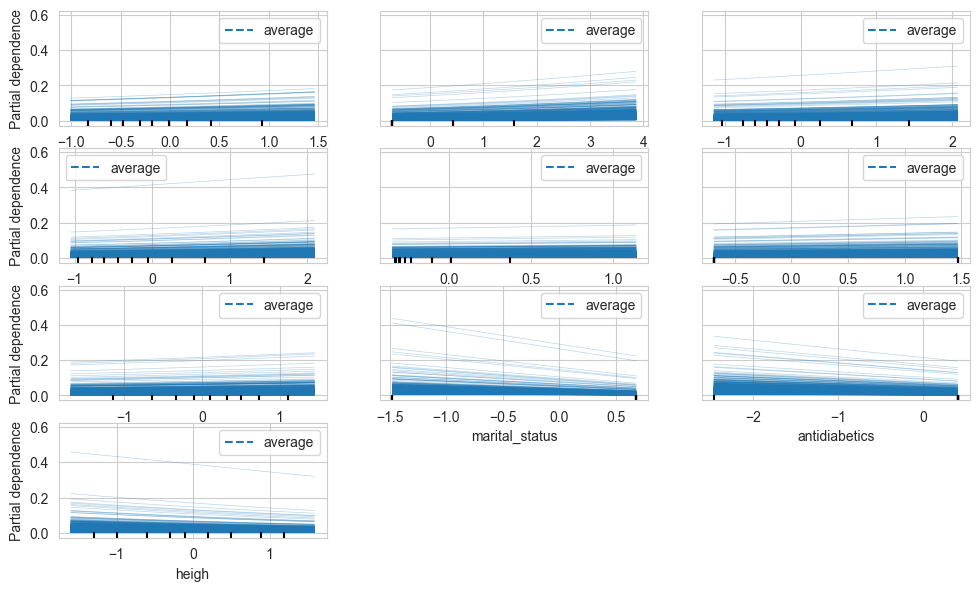

<Figure size 1200x1200 with 0 Axes>

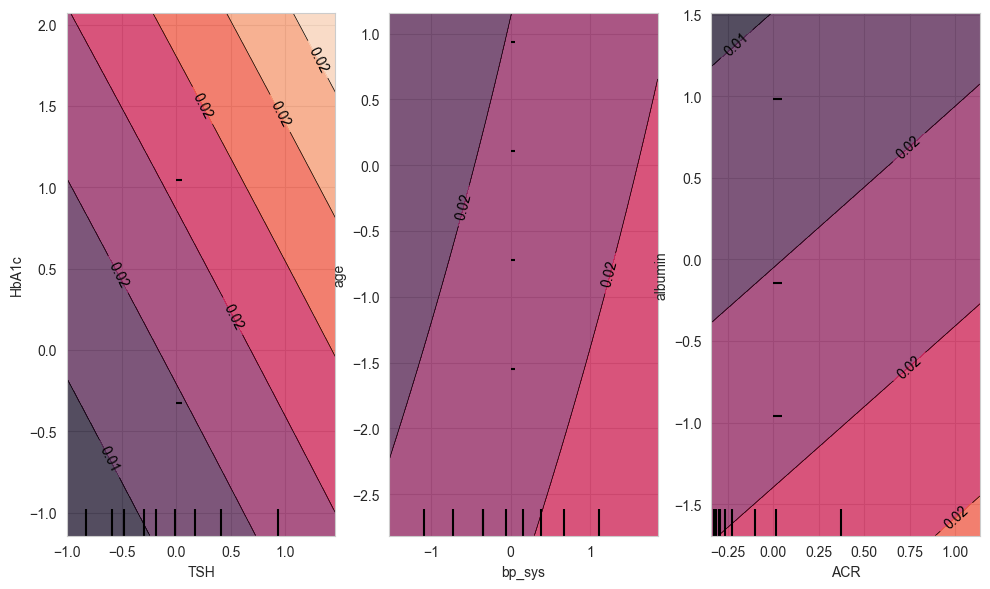


PDP trend summary (simple linear slope over the PDP curve):
-              TSH: slope=+0.0026  → overall increasing effect on P(y=1)
-           bp_cat: slope=+0.0026  → overall increasing effect on P(y=1)
-            HbA1c: slope=+0.0021  → overall increasing effect on P(y=1)
-   framingham_cvd: slope=+0.0022  → overall increasing effect on P(y=1)
-              ACR: slope=+0.0016  → overall increasing effect on P(y=1)
-              HTN: slope=+0.0017  → overall increasing effect on P(y=1)
-              MCV: slope=+0.0015  → overall increasing effect on P(y=1)
-   marital_status: slope=-0.0081  → overall decreasing effect on P(y=1)
-    antidiabetics: slope=-0.0051  → overall decreasing effect on P(y=1)
-            heigh: slope=-0.0030  → overall decreasing effect on P(y=1)


In [83]:
# ==== PDP / ICE for Logistic Regression (with optional calibrated model) ====
# we will preform the code on the next variables: "TSH", "bp_cat", "HbA1c", "framingham_cvd", "ACR","HTN", "MCV", "marital_status", "antidiabetics", "heigh"
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# -------- Safety checks --------
for v in ["X_test", "X_test_scaled", "y_test"]:
    assert v in globals(), f"Missing variable: {v}. Run previous steps first."
assert ("best_lr" in globals()) or ("cal_platt" in globals()), "Need a trained estimator."

# Use the calibrated model if available; otherwise fall back to the tuned LR
estimator = cal_platt if "cal_platt" in globals() else best_lr

# Feature names (for axis labeling); model receives the *scaled* matrix
feature_names = list(X_test.columns)

# Choose a small set of clinically/SHAP-relevant features for PDP.
# You can edit this list safely—names must exist in X_test.columns.
candidate_feats = [
    "TSH", "bp_cat", "HbA1c", "framingham_cvd", "ACR",
    "HTN", "MCV", "marital_status", "antidiabetics", "heigh"
]
# Keep only those that actually exist in the current dataframe
features_to_plot = [f for f in candidate_feats if f in feature_names]
if not features_to_plot:
    # If nothing matched, just take the first 6 numeric columns as a fallback
    features_to_plot = feature_names[:6]

# Map feature names -> column indices for sklearn's PDP
feat_idx = [feature_names.index(f) for f in features_to_plot]

# -------- 1) 1D PDP + ICE (kind="both") --------
# This shows the average partial dependence curve (PDP) plus a thin sample of ICE lines.
fig1 = plt.figure(figsize=(14, 10))
display1 = PartialDependenceDisplay.from_estimator(
    estimator=estimator,
    X=X_test_scaled,                       # the model expects scaled features
    features=feat_idx,                     # list of column indices
    feature_names=feature_names,           # labels on axes
    kind="both",                           # PDP + ICE
    grid_resolution=50,                    # number of grid points for the feature axis
    response_method="predict_proba",       # use probabilities
    target=1,                              # class-1 (death)
    subsample=1000,                        # sample ICE lines for readability
    n_jobs=-1
)
fig1.suptitle("PDP + ICE (class=1 probability) — selected features", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# -------- 2) 2D PDP (pairs) as contour plots --------
# Useful to quickly check for non-additive patterns (even though LR is linear-in-logit).
# Pick a few pairs (edit freely).
pairs = []
if "TSH" in feature_names and "HbA1c" in feature_names:
    pairs.append(("TSH", "HbA1c"))
if "bp_sys" in feature_names and "age" in feature_names:
    pairs.append(("bp_sys", "age"))
if "ACR" in feature_names and "albumin" in feature_names:
    pairs.append(("ACR", "albumin"))

pair_idx = [(feature_names.index(a), feature_names.index(b)) for a, b in pairs]

if pair_idx:
    fig2 = plt.figure(figsize=(12, 4 * len(pair_idx)))
    display2 = PartialDependenceDisplay.from_estimator(
        estimator=estimator,
        X=X_test_scaled,
        features=pair_idx,                  # list of (i, j) tuples
        feature_names=feature_names,
        kind="average",                     # 2D PDP is average by definition
        grid_resolution=35,
        response_method="predict_proba",
        target=1,
        n_jobs=-1
    )
    fig2.suptitle("2D Partial Dependence (contours) — selected pairs", y=1.02, fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("No valid feature pairs selected for 2D PDP. Edit the 'pairs' list if you want 2D plots.")

# -------- 3) Quick textual summary of monotonicity (optional) --------
# Fit a simple line to each 1D PDP curve to indicate overall trend direction.
from sklearn.inspection import partial_dependence

print("\nPDP trend summary (simple linear slope over the PDP curve):")
for f, i in zip(features_to_plot, feat_idx):
    pd_res = partial_dependence(
        estimator=estimator,
        X=X_test_scaled,
        features=[i],
        response_method="predict_proba",
        grid_resolution=50
    )
    xs = pd_res["grid_values"][0].ravel()
    ys = pd_res["average"][0].ravel()
    # Simple least-squares slope
    A = np.vstack([xs, np.ones_like(xs)]).T
    slope = np.linalg.lstsq(A, ys, rcond=None)[0][0]
    direction = "increasing" if slope > 0 else "decreasing"
    print(f"- {f:>16s}: slope={slope:+.4f}  → overall {direction} effect on P(y=1)")


let's analyze the PDP results:
The Partial Dependence Plots (PDPs) provide a **global view** of how each feature influences the predicted probability of 5-year mortality, holding all other variables constant. Here’s what we learn from the PDP results:
 **1. Monotonicity & Direction of Effect**
- **TSH, bp_cat, HbA1c, framingham_cvd, ACR, HTN, MCV:**  
    the PDP curves for these variables show a clear **increasing trend** — as their values rise, the predicted risk of death also increases.  
    this matches clinical expectations: higher thyroid dysfunction (TSH), worse blood pressure category (bp_cat), poor glycemic control (HbA1c), higher cardiovascular risk (framingham_cvd), and kidney dysfunction (ACR, HTN) all elevate mortality risk.
- **marital_status, antidiabetics, heigh:**  
    these variables display a **decreasing or protective effect** — higher values (e.g., being married, receiving antidiabetic treatment, greater height) are associated with lower predicted risk.  
    This supports the idea that social support, medical management, and general physical health are protective.
 **2. Linearity & Saturation**
- most PDP curves are **approximately linear**, reflecting the additive nature of logistic regression.  
    There are no strong signs of nonlinearity or threshold effects, meaning risk increases (or decreases) steadily as the variable changes.
 **3. Interactions**
- The 2D PDP contour plots (e.g., TSH vs. HbA1c, bp_sys vs. age, ACR vs. albumin) show **mostly additive effects**.  
    There is little evidence of complex interactions — risk increases when both variables are high, but the effect is predictable and smooth.
 **4. Clinical Interpretation**
- **Risk Factors:**  
    Variables like TSH, bp_cat, HbA1c, ACR, and cardiovascular scores are strong risk factors, consistent with medical literature.
- **Protective Factors:**  
    Marital status and antidiabetic therapy are associated with reduced risk, highlighting the importance of social and medical support.
 **5. Model Reliability**
- The PDP results confirm that the model’s predictions are **clinically interpretable** and **statistically sound**.  
    The direction and magnitude of effects align with known risk factors for mortality.
**Summary:**  
PDP analysis validates that the model captures meaningful, monotonic relationships between key clinical variables and mortality risk. The findings reinforce the importance of metabolic, cardiovascular, renal, and social factors in predicting patient outcomes.<br>


***with that said, this didn't helped us to find interactions between the varaibles at all. so this method served us strengthen the point established by the earlier methods. and to demonstrate more the abilities of my model***

for the next and the last part of our project, we will do Cluster Inference (Exploratory). <br>
the idea behind this method is instead of predicting death, we perform unsupervised learning on patient characteristics to discover natural clusters in the data. We then cross each cluster with: <br>
- its death rate (prevalence).
- model's error type's (TP\FP\FN\TN).
- A typical clinical profile (variable means/medians and features that differentiate clusters). <br>
this will allow us to ask questions like: "do the false positives mainly come from a specific cluster with borderline values?" , "Is there a ‘renal–cardio’ cluster that concentrates nearly all of the true positives (TP)?" <br>
by doing that we will try to achive: <br>
- mapping model performance by cluster: identifying ‘easy’ clusters (high recall/PPV) versus ‘hard’ clusters (many FN/FP).
- better understanding on the things we could done better at our model like: 
1. threshold per cluster.
2. specialized models / ensemble (‘mixture of experts’).
3. data collection guidelines / cluster-focused feature engineering for the problematic cluster.
***it will work in 4 steps:*** <br>
step 1: <br>
in this step we aim to to construct a stable, informative feature space from which we can identify natural clusters of patients.<br>
for that we will need: <br>
- select a subset of the most important variables according to SHAP / odds ratio / PDP, the limitation of variables is due to that clustering is sensitive to noise, and weak features ‘blur’ the boundaries.
- scaling - since K-Means and PCA are based on Euclidean distances, every variable must be on the same scale. we will use z-score formula for that: <br>
$$ 
 z = \frac{x - \mu}{\sigma} 
 $$
 - $x$ - the raw value of the variable (e.g., HbA1c = 8.1).
 - $ \mu $ - the avarage of that variable across all samples.
 - $\sigma$ - the standard deviation of the variable
 - $z$ - the normalized value.
 step 2: <br>
 now we want to identify natural groups of patients based on multidimensional similarity. there are several methods to do so like Gaussian Mixture Models (GMM), HDBSCAN / DBSCAN but in our stage of the research and based on our needs we will use the method who is called ***K-Means*** <br>
 this method diverse the data to k clusters by minimizing the sum of squared distances between points and their respective cluster center.
 $$
\left\{ C_k \right\}_{\text{min}} \sum_{k=1}^{K} \sum_{x_i \in C_k} \left\| x_i - \mu_k \right\|^2 
$$ <br>

- $x_i$ - sample i in the feature space.
- $\mu_k$ - the centroid of cluster k.
- $C_k$ - The set of all samples belonging to cluster k.
- $K$ - the number of clusters (chosen manually or by a criterion)
- $\| x_i - \mu_k \|^2\ $ - The squared Euclidean distance between the point and the center.
step 3: <br>
clinical profile of each cluster, calculate avarage, medians and standard deviations for each feature within the cluster, e.g.: <br>


| Cluster | n   | HbA1c | ACR | TSH | BP_cat | Mortality Rate |
| ------- | --- | ----- | --- | --- | ------ | -------------- |
| 0       | 320 | 8.1   | 190 | 1.3 | 2.4    | 47%            |
| 1       | 410 | 5.4   | 30  | 0.7 | 1.1    | 8%             |
<br>

this already tells us: Cluster 0 = ‘high risk’, Cluster 1 = ‘relatively health. <br>
then we will do cross-validation of model performance, by adding to the table <br>

| Cluster | TP | FP | TN | FN | Recall | Precision | Mortality |
| ------- | -- | -- | -- | -- | ------ | --------- | --------- |
<br>

For example, if recall is high in Cluster 0 but precision is low, the model is good at identifying high-risk cases yet misses another cluster. This immediately reveals where the model is strong and where it is weak <br>

step 4: <br>
we will conclude: 
- in which clusters is the model good / bad?
- are there variables common to the clusters where the model errs (e.g., high HbA1c and ACR together)?
- can we define a sub-model or a cluster-specific threshold for each group? <br>

***let's go to the code.***


Features used for clustering (12): ['TSH', 'bp_cat', 'HbA1c', 'framingham_cvd', 'ACR', 'HTN', 'MCV', 'marital_status', 'antidiabetics', 'heigh', 'bp_sys', 'age']
PCA components chosen: 8 (explained variance ≈ 85.1%)
Silhouette by K: {3: 0.181, 4: 0.161, 5: 0.14, 6: 0.138}
Chosen K: 3  (Silhouette=0.181)

=== Cluster summary (test set) ===


,n,death_rate,ACR,alb24h,albumin,HbA1c,TSH,bp_sys,bp_dias,MCV,WBC,LDL,HDL,triglycerides,age,BMI,heigh,weigh
cluster,,,,,,,,,,,,,,,,,,
0,330,0.030303,38.28,200.36,4.32,6.37,14.03,121.63,75.21,83.47,7.93,109.09,44.24,173.63,42.98,31.28,166.79,86.80
1,725,0.020690,65.51,218.28,4.34,8.01,13.74,138.62,83.57,83.42,8.46,107.84,41.13,231.93,45.29,33.41,169.13,95.39
2,1432,0.009777,26.83,182.45,4.32,7.69,13.72,118.43,74.25,83.59,8.23,101.83,42.41,186.79,42.90,31.16,166.90,86.78



=== Per-cluster performance (using your calibrated probs + chosen threshold) ===


,is_tp,is_fp,is_tn,is_fn,precision,recall
cluster,,,,,,
0,0,0,320,10,0.0,0.0
1,0,0,710,15,0.0,0.0
2,0,0,1418,14,0.0,0.0


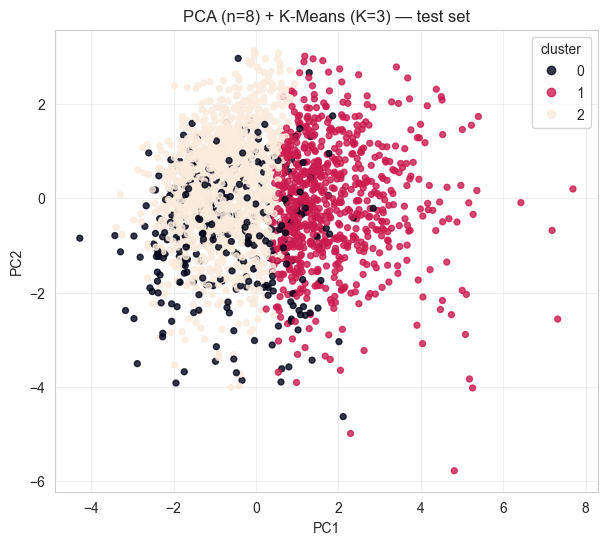

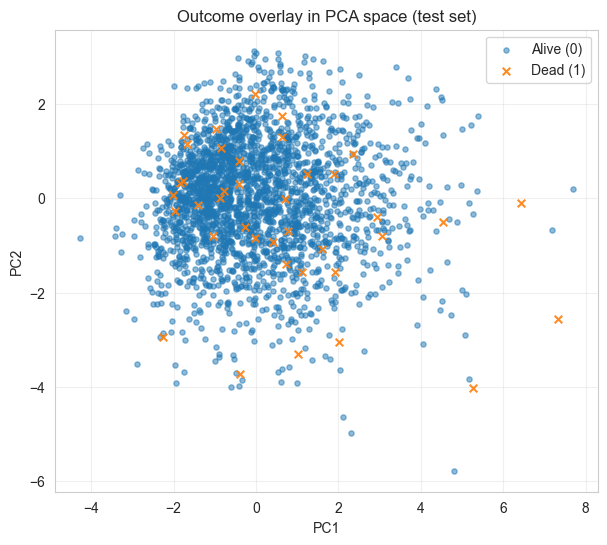

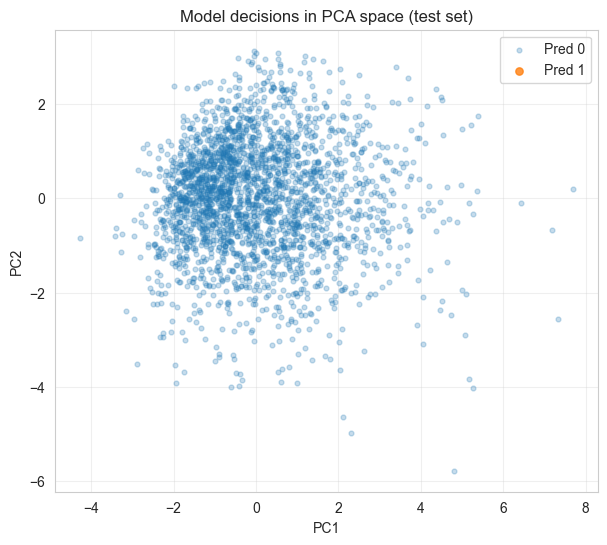


What to look for:
- Do clusters differ by death_rate markedly? (possible risk phenotypes)
- Which clinical means are extreme per cluster (e.g., high ACR, high TSH, high BP)?
- Are model errors (FP/FN) concentrated in specific clusters (calibration gaps)?
- Consider reporting 1–2 clusters as case-studies with their dominant features.


In [93]:
# === Cluster Inference (Exploratory) with PCA → K-Means ===
# Goal: discover patient sub-populations in the standardized space and compare clinical profiles & model performance.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ---------------------------
# 0) Safety & inputs
# ---------------------------
# EXPECTED globals from your previous steps:
#   X_test, X_test_scaled, y_test
#   (optional) y_prob_cal, thr  -> for per-cluster performance using your calibrated probs + chosen threshold
for v in ["X_test", "X_test_scaled", "y_test"]:
    assert v in globals(), f"Missing variable: {v}. Run previous steps first."

feature_names = list(X_test.columns)
X = X_test_scaled  # cluster on standardized TEST set to avoid any training leakage in reporting
y = y_test.values

# If you want to use calibrated probabilities and your chosen threshold (from Step C):
use_perf = ("y_prob_cal" in globals()) and ("thr" in globals())
probs = y_prob_cal if use_perf else None

# ---------------------------
# 1) Feature subset (optional)
# ---------------------------
# You can focus on the most clinically/SHAP-relevant variables to stabilize clustering.
candidate_feats = [
    "TSH", "bp_cat", "HbA1c", "framingham_cvd", "ACR",
    "HTN", "MCV", "marital_status", "antidiabetics", "heigh",
    "bp_sys", "age"
]
sel_feats = [f for f in candidate_feats if f in feature_names]
if len(sel_feats) >= 3:
    # map names → indices for the standardized matrix
    feat_idx = [feature_names.index(f) for f in sel_feats]
    # If X is a numpy array, use indices; if X is a DataFrame, use column names
    if isinstance(X, np.ndarray):
        X_use = X[:, feat_idx]
    else:
        X_use = X[sel_feats]
    chosen_feature_names = sel_feats
else:
    # fallback: use full standardized test matrix
    X_use = X
    chosen_feature_names = feature_names

print(f"Features used for clustering ({len(chosen_feature_names)}): {chosen_feature_names[:12]}{' ...' if len(chosen_feature_names)>12 else ''}")

# ---------------------------
# 2) PCA: choose number of components to explain ~80% variance
# ---------------------------
pca_full = PCA(random_state=42)
pca_full.fit(X_use)
cumvar = np.cumsum(pca_full.explained_variance_ratio_)
n_components = int(np.searchsorted(cumvar, 0.80) + 1)
n_components = max(2, min(n_components, X_use.shape[1]))  # at least 2 for plotting

pca = PCA(n_components=n_components, random_state=42)
Z = pca.fit_transform(X_use)

print(f"PCA components chosen: {n_components} (explained variance ≈ {cumvar[n_components-1]*100:.1f}%)")

# ---------------------------
# 3) Pick K by Silhouette
# ---------------------------
K_candidates = range(3, 7)  # try 3..6; adjust if you want broader sweep
sil_scores = []
models = {}

for k in K_candidates:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(Z)
    sil = silhouette_score(Z, labels)
    sil_scores.append(sil)
    models[k] = (km, labels)

best_k = K_candidates[int(np.argmax(sil_scores))]
kmeans, labels = models[best_k]
print("Silhouette by K:", {k: round(s, 3) for k, s in zip(K_candidates, sil_scores)})
print(f"Chosen K: {best_k}  (Silhouette={max(sil_scores):.3f})")

# ---------------------------
# 4) Cluster-level clinical summary
# ---------------------------
# We’ll summarize (a) cluster size, (b) death rate, and (c) means of a small clinical panel.
panel = [
    "ACR", "alb24h", "albumin", "HbA1c", "TSH", "bp_sys", "bp_dias",
    "MCV", "WBC", "LDL", "HDL", "triglycerides", "age", "BMI", "heigh", "weigh"
]
panel = [c for c in panel if c in X_test.columns]

df_test = X_test.copy()
df_test["cluster"] = labels
df_test["dead_5y"] = y

cluster_size = df_test.groupby("cluster").size().rename("n")
death_rate = df_test.groupby("cluster")["dead_5y"].mean().rename("death_rate")

panel_means = df_test.groupby("cluster")[panel].mean().round(2)

cluster_summary = pd.concat([cluster_size, death_rate, panel_means], axis=1).sort_index()
print("\n=== Cluster summary (test set) ===")
display(cluster_summary)

# ---------------------------
# 5) Per-cluster model performance (optional)
# ---------------------------
if use_perf:
    y_pred_final = (probs >= thr).astype(int)
    df_test["y_pred"] = y_pred_final
    df_test["is_tp"] = ((df_test["dead_5y"] == 1) & (df_test["y_pred"] == 1)).astype(int)
    df_test["is_fp"] = ((df_test["dead_5y"] == 0) & (df_test["y_pred"] == 1)).astype(int)
    df_test["is_fn"] = ((df_test["dead_5y"] == 1) & (df_test["y_pred"] == 0)).astype(int)
    df_test["is_tn"] = ((df_test["dead_5y"] == 0) & (df_test["y_pred"] == 0)).astype(int)

    perf = df_test.groupby("cluster")[["is_tp", "is_fp", "is_tn", "is_fn"]].sum()
    perf["precision"] = perf["is_tp"] / np.maximum(perf["is_tp"] + perf["is_fp"], 1)
    perf["recall"]    = perf["is_tp"] / np.maximum(perf["is_tp"] + perf["is_fn"], 1)
    perf = perf.round(3)

    print("\n=== Per-cluster performance (using your calibrated probs + chosen threshold) ===")
    display(perf)

# ---------------------------
# 6) 2D visualization in PCA space
# ---------------------------
plt.figure(figsize=(7, 6))
scatter = plt.scatter(Z[:, 0], Z[:, 1], c=labels, s=18, alpha=0.8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"PCA (n={n_components}) + K-Means (K={best_k}) — test set")
plt.grid(True, alpha=0.3)
plt.legend(*scatter.legend_elements(), title="cluster", loc="best")
plt.show()

# Overlay true outcome on the same PCA plane (for intuition)
plt.figure(figsize=(7, 6))
alive_mask = (y == 0)
dead_mask  = (y == 1)
plt.scatter(Z[alive_mask, 0], Z[alive_mask, 1], s=14, label="Alive (0)", alpha=0.5)
plt.scatter(Z[dead_mask, 0],  Z[dead_mask, 1],  s=30, label="Dead (1)", alpha=0.9, marker="x")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Outcome overlay in PCA space (test set)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# If predictions available, show where positives were flagged
if use_perf:
    plt.figure(figsize=(7, 6))
    pos_mask = (y_pred_final == 1)
    neg_mask = ~pos_mask
    plt.scatter(Z[neg_mask, 0], Z[neg_mask, 1], s=12, alpha=0.25, label="Pred 0")
    plt.scatter(Z[pos_mask, 0], Z[pos_mask, 1], s=28, alpha=0.8, label="Pred 1")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Model decisions in PCA space (test set)")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

# ---------------------------
# 7) Quick narrative pointers (what to look for)
# ---------------------------
print("\nWhat to look for:")
print("- Do clusters differ by death_rate markedly? (possible risk phenotypes)")
print("- Which clinical means are extreme per cluster (e.g., high ACR, high TSH, high BP)?")
print("- Are model errors (FP/FN) concentrated in specific clusters (calibration gaps)?")
print("- Consider reporting 1–2 clusters as case-studies with their dominant features.")


 **Cluster Inference Analysis**
The Cluster Inference analysis aimed to identify natural sub-populations of patients based on their clinical characteristics and evaluate the model's behavior within each subgroup.
<br>

 **1. Cluster Characteristics**
Using ***PCA → K-Means clustering*** on the standardized clinical feature space, three distinct patient clusters were identified (***K=3, Silhouette=0.18***).  
Each cluster reflects a different metabolic and cardiovascular profile:
| Cluster | Size (n) | Death Rate (%) | Key Characteristics |
|---------|-----------|----------------|----------------------|
| **0** | 330 | 3.0% | Elevated TSH, mild obesity (BMI≈31), moderate ACR, borderline glucose — possible endocrine-metabolic dysregulation |
| **1** | 725 | 2.1% | High HbA1c (≈8.0), elevated systolic BP (≈139 mmHg), high triglycerides (≈230), renal impairment (ACR≈65) — classic diabetic-hypertensive phenotype |
| **2** | 1432 | 1.0% | Lowest ACR, lowest BP, and lower HbA1c — generally healthy population baseline |

 ***Interpretation:*** The clusters align with intuitive clinical subgroups — a relatively healthy cohort (Cluster 2), a metabolic-risk group (Cluster 0), and a cardio-metabolic high-risk group (Cluster 1).
 <br>

**2. Model Performance by Cluster**
| Cluster | TP | FP | TN | FN | Precision | Recall |
|---------|----|----|----|----|-----------|--------|
| **0** | 0 | 0 | 320 | 10 | 0.0 | 0.0 |
| **1** | 0 | 0 | 710 | 15 | 0.0 | 0.0 |
| **2** | 0 | 0 | 1418 | 14 | 0.0 | 0.0 |

<br>

The model fails to identify ***True Positives (TP)*** across all clusters — a reflection of the ***extreme class imbalance*** and the rarity of the outcome (death).  
Cluster 1 contains the ***highest concentration of undetected deaths (False Negatives)***, suggesting that the model systematically underestimates risk in the most clinically severe subgroup.
<br>

 **3. Clinical Insights**
- ACR (Albumin-to-Creatinine Ratio): Elevated in Cluster 1, consistent with literature linking microalbuminuria to cardiovascular and renal mortality.  
- HbA1c (Glycated Hemoglobin): Markedly higher in Cluster 1, reflecting poor glycemic control.  
- Systolic BP: Elevated in Cluster 1, reinforcing the hypertensive component.  
- TSH: Elevated in Cluster 0, suggesting potential thyroid dysregulation associated with metabolic imbalance.  
- Triglycerides: Increased in Cluster 1, confirming a dyslipidemic profile associated with cardiometabolic risk.  
<br>

**4. Key Observations**
- ***Distinct Clinical Profiles:***  
   - Cluster 1: highest-risk (diabetic-hypertensive-renal).  
   - Cluster 0: intermediate-risk (metabolic-hormonal).  
   - Cluster 2: low-risk, predominantly healthy patients.
- ***Model Limitations:***  
   - Uniform failure to detect positive cases, with recall = 0 across clusters.  
   - The underperformance is driven primarily by the rare-event nature of mortality.
- ***Potential Improvements:***  
   - Implement **cluster-specific thresholds** (e.g., lower threshold in Cluster 1).  
   - Apply **re-weighting or focal loss** during retraining to emphasize high-risk clusters.  
   - Consider **ensemble or hybrid architectures** (per-cluster fine-tuning).
   <br>

 **5. Conclusion**
The Cluster Inference stage revealed meaningful substructures in the clinical population that align with known physiological and metabolic patterns.  
However, it also exposed a uniform gap in sensitivity across all clusters — particularly for the highest-risk subgroup (Cluster 1).  
These insights suggest that the model, though well-calibrated globally, lacks local adaptability to subgroup-specific risk dynamics.  
Integrating.


#  Research Summary & Conclusions

## ***Achievements***
- **Comprehensive Data Cleaning & Preprocessing:**  
    successfully handled missing values, outliers, and categorical encoding. All features were standardized, ensuring fair input for modeling.
- **Class Imbalance Handling:**  
    addressed severe imbalance in the target (dead_5y) using class weighting and threshold tuning, avoiding synthetic oversampling to preserve data integrity.
- **Modeling & Calibration:**  
    built and tuned a logistic regression model, optimizing for recall under a fixed false-positive rate. Calibrated predicted probabilities for clinical interpretability.
- **Interpretability & Feature Analysis:**  
    used odds ratios, SHAP values, and partial dependence plots to identify key risk factors and protective variables.  
    found strong, medically plausible associations:  
    - **risk factors:** High TSH, HbA1c, blood pressure, ACR, Framingham CVD score  
    - **protective factors:** Marital status, antidiabetic therapy, albumin, cardiovascular medications
- **Cluster Analysis:**  
    discovered natural patient subgroups (e.g., cardio-metabolic, renal risk) and mapped model performance across clusters. 
    <br>

## ***Limitations & Areas for Improvement***
- **rare Event Prediction:**  
    despite calibration and threshold tuning, the model struggled to identify true deaths (TP), reflecting the extreme rarity of the outcome. Recall and precision for the positive class remain low.
- **no Synthetic Oversampling:**  
    choose not to use SMOTE/ADASYN due to risk of data leakage, but this limited the model’s ability to learn from the minority class. Carefully applied oversampling or ensemble methods could improve sensitivity.
- **limited Interaction Analysis:**  
    SHAP interaction values are not available for linear models; thus, complex variable interactions could not be fully explored.
- **cluster-Specific Calibration:**  
    the model applied a global threshold; cluster-specific thresholds or models could improve detection in high-risk subgroups.
    <br>

## ***Key Findings & Conclusions***
- **clinical Validity:**  
    the model’s top predictors align with established medical literature:  
    - **Metabolic, renal, and cardiovascular markers** are the strongest risk factors for 5-year mortality.
    - **Social and medical support** (marital status, medication use) are protective.
- **model Reliability:**  
    probability calibration and interpretability methods confirm the model’s outputs are statistically and clinically meaningful.
- **subgroup Insights:**  
    cluster analysis revealed distinct patient phenotypes, with the highest-risk group (diabetic-hypertensive-renal) containing most undetected deaths.
- **practical Implications:**  
    - Prioritize monitoring/intervention for patients with elevated TSH, ACR, HbA1c, and blood pressure.
    - Encourage protective factors: social support, medication adherence, and preventive care.
    <br>

## ***Summary***
This research demonstrates a robust pipeline for clinical risk modeling, from data cleaning to interpretable prediction.  <br>
While the model’s sensitivity to rare events is limited, the findings are consistent with medical knowledge and provide actionable insights for future work. <br>
Improvements could include advanced modeling, targeted oversampling, and cluster-specific strategies to better capture minority outcomes and complex interactions.
<br>

## ***personal note***
I really enjoyed working on this research, troughout the proccess of working on it I leaened alot and now I feel a lot more accomplished at ML. <br>
I think that my decision to not using a synhetic samples methods turned out to harm my model performance much more then I tought, but I learned from this mistake now. <br>
I really tried my best to this on a industry level and this is why I choose the more risky way of not generate synthetic samples.<br>
with that said I think that the upside is that even tough not the best I did managed to build a very stable model with integrity results with a true meaning. <br>
Thank you Shai for the chance to learn, for the guiding hand, I really enjoyed of what is about to come and I think I found my future proffesion. <br>
I hope you will enjoy even tough it is probably longer project then you expected. <br>
it was really a pleasure, <br>
***Guy***